# Data Exploration and Car Price Prediction based on Cars registered in Germany between 2011 and 2021(Data extracted 09/06/2021)

## Data Exploration

### Exploratory Data Analysis

In [1]:
import pandas as pd 
 
cars = pd.read_csv('./germany-cars.csv') 

In [2]:
# Print sample with 20 rows
cars.sample(frac=1).head(n=20) 

,mileage,make,model,fuel,gear,offerType,price,hp,year
6832,117425,Mazda,6,Diesel,Automatic,Used,11620,150.0,2014
30059,225884,Volkswagen,Polo,Diesel,Manual,Used,5700,75.0,2012
42148,35000,Citroen,C3,Gasoline,Manual,Used,11940,82.0,2018
36396,100000,Skoda,Fabia,Gasoline,Manual,Used,6450,105.0,2013
6126,49900,Mitsubishi,Colt,Gasoline,Manual,Used,4990,75.0,2011
16434,19580,Volkswagen,up!,Gasoline,Manual,Used,9475,60.0,2019
17147,79000,Renault,Twingo,Gasoline,Manual,Used,3790,75.0,2011
1186,18350,BMW,218,Gasoline,Automatic,Used,24500,140.0,2019
31141,98750,Mitsubishi,Space Star,Gasoline,Manual,Used,4690,71.0,2013
41949,62100,Volvo,XC90,Diesel,Automatic,Used,35890,190.0,2018


In [3]:
# Print unique values for fields gear and offer type
cars.gear.unique() 
cars.offerType.unique() 

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [4]:
# Print descriptive statistics for numeric values to spot outliers and possible errors
(cars.describe(percentiles=[.01, .25, .5, .75, .99]).apply( 
	lambda s: s.apply('{0:.2f}'.format)))

,mileage,price,hp,year
count,46405.00,46405.00,46376.00,46405.00
mean,71177.86,16572.34,132.99,2016.01
std,62625.31,19304.70,75.45,3.16
min,0.00,1100.00,1.00,2011.00
1%,5.00,3299.00,60.00,2011.00
25%,19800.00,7490.00,86.00,2013.00
50%,60000.00,10999.00,116.00,2016.00
75%,105000.00,19490.00,150.00,2019.00
99%,259633.64,83490.00,450.00,2021.00
max,1111111.00,1199900.00,850.00,2021.00


### Car Makes Visualization

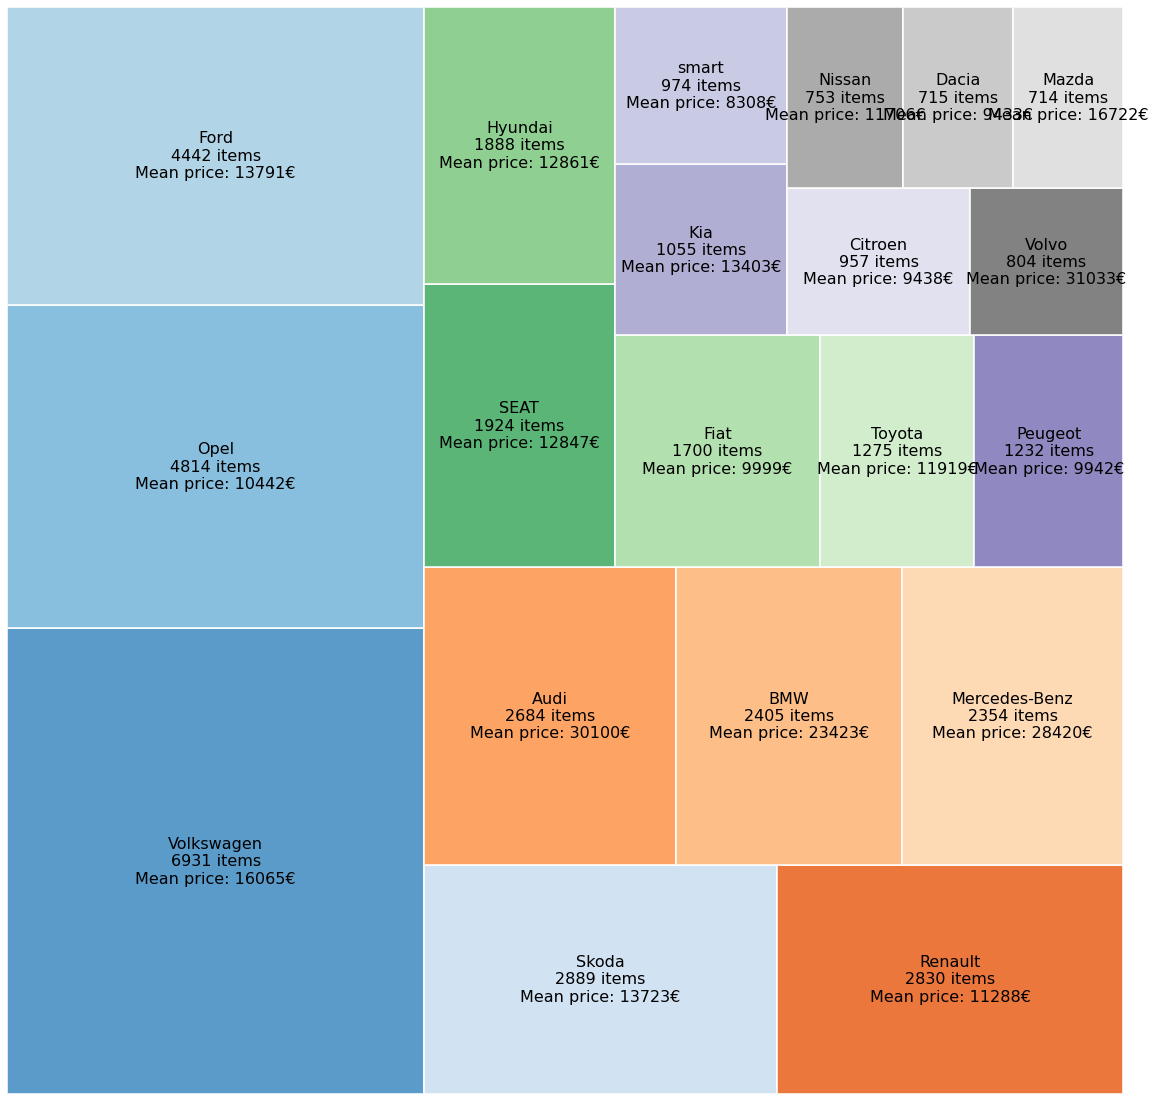

In [5]:
import matplotlib.pyplot as plt 
import squarify 

# Adjust plot size and plot font size
plt.rcParams["figure.figsize"]=20,20
font = {'size'   : 16}
plt.rc('font', **font)

# Create new data frame with top 20 makes by value count
makes = pd.DataFrame(cars.make.value_counts()) 
makes.reset_index(level=0, inplace=True) 
makes = makes.sort_values(by='make', ascending=False).head(20) 
makes.columns = ('make', 'size') 

# Group cars by make, extract means per make into new data frame
# and merge mean prices back into makes data frame
group = cars.groupby(cars.make) 
mean_price = pd.DataFrame(group.price.mean()) 
mean_price.reset_index(level=0, inplace=True) 
makes = pd.merge(makes, mean_price, how='left', on='make') 

# Create labels with make, number of items and mean price.
# Divide into rectangles and size rectangles according number of items.
# Hide axis and print plot.
labels = ["%s\n%d items\nMean price: %d€" % (label) for label in 
	zip(makes['make'], makes['size'], makes['price'])] 
squarify.plot(sizes=makes['size'], label=labels, alpha=.8, 
	color=plt.cm.tab20c.colors, edgecolor="white", linewidth=2) 

plt.axis('off') 
plt.show() 

### Fuel Types Visualization

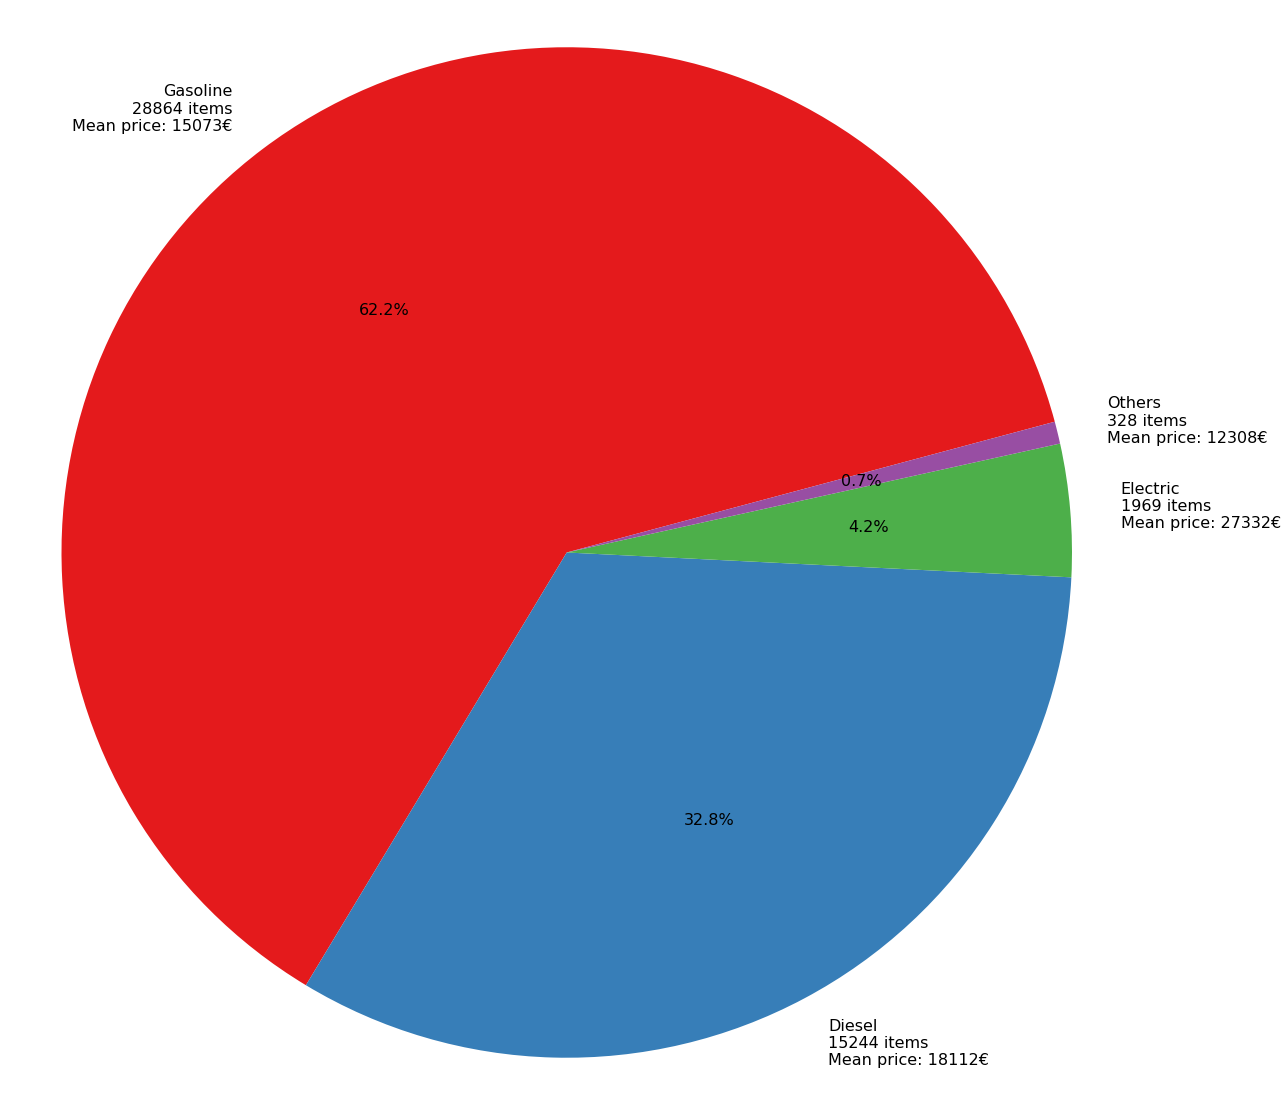

In [6]:
# Group electrics and others
cars['fuel'] = cars['fuel'].replace( 
	['Electric/Gasoline', 'Electric/Diesel', 'Electric'], 
	'Electric') 
cars['fuel'] = cars['fuel'].replace( 
	['CNG', 'LPG', 'Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 
	'Others') 

# Calculate totals per fuel and print pie chart
fuels = pd.DataFrame(cars['fuel'].value_counts()) 
group = cars.groupby(cars['fuel']) 
mean_price = pd.DataFrame(group.price.mean()) 
mean_price.reset_index(level=0, inplace=True) 
fuels.reset_index(level=0, inplace=True) 
fuels.columns = ('fuel', 'size') 
fuels = pd.merge(fuels, mean_price, how='left', on='fuel') 
 
labels = ["%s\n%d items\nMean price: %d€" % (label) for label in 
	zip(fuels['fuel'], fuels['size'], fuels['price'])] 
fig1, ax1 = plt.subplots() 
ax1.pie(fuels['size'], labels=labels, 
	autopct='%1.1f%%', startangle=15, colors=plt.cm.Set1.colors) 
ax1.axis('equal') 
plt.rcParams["figure.figsize"]=10,10

font = {'size'   : 22}
plt.rc('font', **font)
plt.show() 

###  Fuel Types per Year

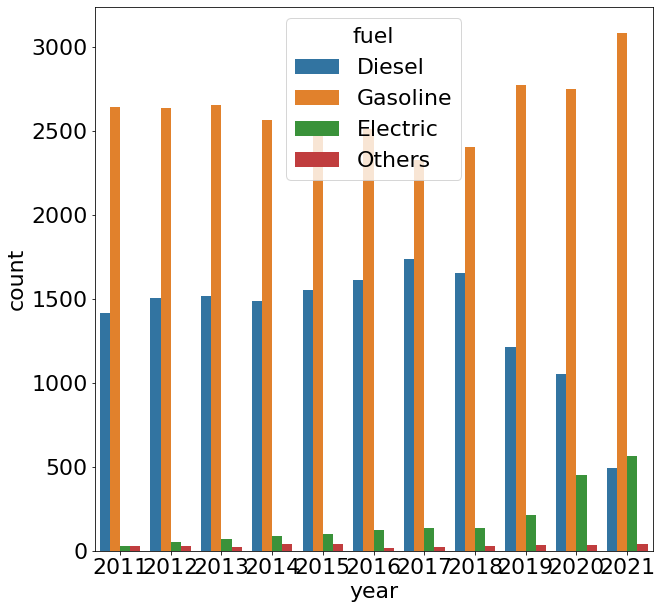

In [7]:
import seaborn as sns 

sns.countplot(x="year", hue="fuel", data=cars) 
# plt.rcParams["figure.figsize"]=10,10
font = {'size'   : 11}
plt.rc('font', **font)
plt.show() 

## Car Price Prediction

## Data Cleaning 

In [8]:
from datetime import datetime
from scipy import stats 

# Replace year with age and remove make, model and fuel
cars['age'] = datetime.now().year - cars['year'] 
cars = cars.drop('year', axis=1) 
cars = cars.drop('make', axis=1) 
cars = cars.drop('model', axis=1) 
cars = cars.drop('fuel', axis=1) 

# Drop empty and null values. Remove outliers with 
# standard deviations more than three from mean
cars = cars.dropna() 
cars = cars[stats.zscore(cars.price) < 3] 
cars = cars[stats.zscore(cars.hp) < 3] 
cars = cars[stats.zscore(cars.mileage) < 3] 

# Replace category values with boolean markers
offerTypeDummies = pd.get_dummies(cars.offerType) 
cars = cars.join(offerTypeDummies) 
cars = cars.drop('offerType', axis=1) 
 
gearDummies = pd.get_dummies(cars.gear) 
cars = cars.join(gearDummies) 
cars = cars.drop('gear', axis=1) 

## Visual Correlation Check

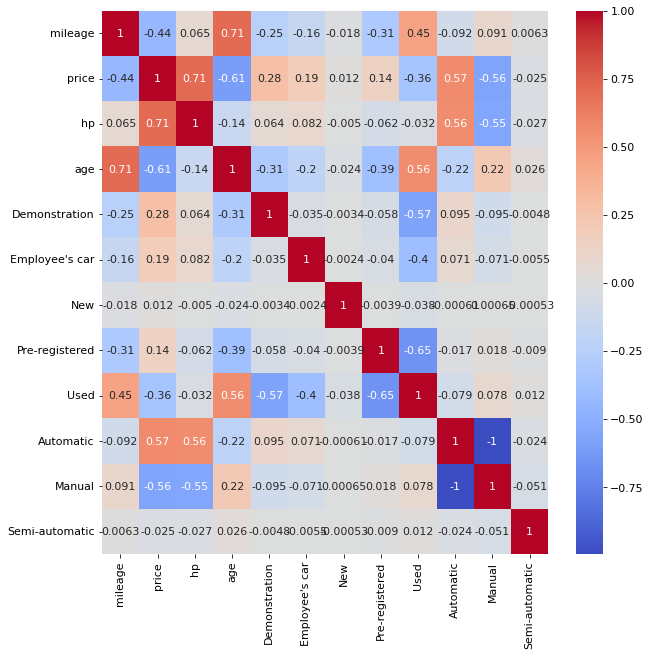

In [9]:
import seaborn as sns 
 
# Show correlation between features    
font = {'size'   : 11}
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm') 
plt.show() 

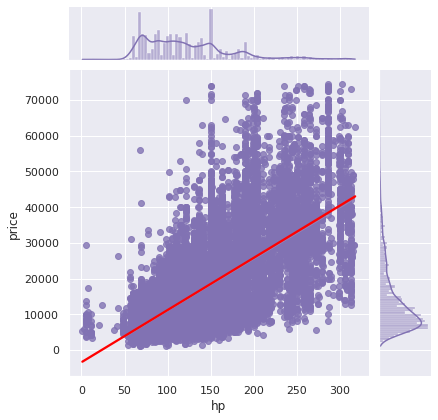

In [10]:
# Double check correlation between horse power with price and mileage with pice
# Plot relation between horse power with price 
sns.set_theme(style="darkgrid") 
sns.jointplot(x="hp", y="price", data=cars, 
	kind="reg", color="m", line_kws={'color': 'red'}) 
plt.show() 

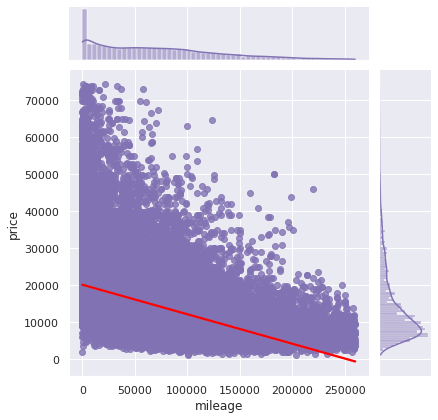

In [11]:
# Plot relation between mileage with price
sns.set_theme(style="darkgrid") 
sns.jointplot(x="mileage", y="price", data=cars, 
	kind="reg", color="m", line_kws={'color': 'red'}) 
plt.show() 

## Price Prediction

To check quality of results R-Squared is used for all models. R² is the percentage of variation (i.e. varies from 0 to 1) explained by the relationship between two variables (i.e. R² = 0.96 ~ 96% less variation around the line than the mean).

In [12]:
from sklearn.model_selection import train_test_split 

# Declare X and Y containing price and all other features
# Split data into train (70%) and test (30%) data sets 
X = cars.drop('price', axis=1) 
Y = cars.price 
X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, train_size=0.7, test_size=0.3, random_state=100) 

### Linear Model from sklearn

In [13]:
from sklearn import linear_model 
from sklearn.metrics import r2_score 
 
lm = linear_model.LinearRegression() 
print(X_train)
lm.fit(X_train, y_train) 

y_pred = lm.predict(X_test) 
print(r2_score(y_true=y_test, y_pred=y_pred))

       mileage     hp  age  Demonstration  Employee's car  New  \
41889    92062  190.0    4              0               0    0   
43820    15454  156.0    3              0               0    0   
5763     99231  102.0    9              0               0    0   
39140    50100  200.0    7              0               0    0   
38240    95209   69.0    8              0               0    0   
...        ...    ...  ...            ...             ...  ...   
17043    21900   90.0    5              0               0    0   
81      240000  190.0    7              0               0    0   
12701    99893  140.0   10              0               0    0   
14806   182400  116.0   10              0               0    0   
40086   156000  150.0    6              0               0    0   

       Pre-registered  Used  Automatic  Manual  Semi-automatic  
41889               0     1          1       0               0  
43820               0     1          0       1               0  
5763        

### CatBoost Regressor

In [14]:
from catboost import CatBoostRegressor 
 
model = CatBoostRegressor(iterations=6542, learning_rate=0.03) 
model.fit( 
	X_train, y_train, 
	eval_set=(X_test, y_test), 
) 
print(model.score(X, Y))

0:	learn: 10177.7492890	test: 10270.9290281	best: 10270.9290281 (0)	total: 50.3ms	remaining: 5m 29s
1:	learn: 9943.9177971	test: 10036.2609428	best: 10036.2609428 (1)	total: 52ms	remaining: 2m 50s
2:	learn: 9717.6254775	test: 9807.9964524	best: 9807.9964524 (2)	total: 53.6ms	remaining: 1m 56s
3:	learn: 9493.6352021	test: 9581.8528670	best: 9581.8528670 (3)	total: 55.4ms	remaining: 1m 30s
4:	learn: 9277.8766959	test: 9365.2684914	best: 9365.2684914 (4)	total: 57.3ms	remaining: 1m 14s
5:	learn: 9070.2476834	test: 9157.2467088	best: 9157.2467088 (5)	total: 59.2ms	remaining: 1m 4s
6:	learn: 8870.5247245	test: 8957.1925987	best: 8957.1925987 (6)	total: 61.2ms	remaining: 57.1s
7:	learn: 8679.3366522	test: 8765.6736239	best: 8765.6736239 (7)	total: 63ms	remaining: 51.5s
8:	learn: 8491.4609746	test: 8577.8288233	best: 8577.8288233 (8)	total: 64.9ms	remaining: 47.1s
9:	learn: 8309.1966325	test: 8395.1933877	best: 8395.1933877 (9)	total: 66.7ms	remaining: 43.6s
10:	learn: 8135.1152762	test: 8221

116:	learn: 3770.1945864	test: 3917.6145884	best: 3917.6145884 (116)	total: 246ms	remaining: 13.5s
117:	learn: 3767.4829378	test: 3915.4806531	best: 3915.4806531 (117)	total: 248ms	remaining: 13.5s
118:	learn: 3764.7880255	test: 3913.3057711	best: 3913.3057711 (118)	total: 250ms	remaining: 13.5s
119:	learn: 3762.5265173	test: 3911.2332431	best: 3911.2332431 (119)	total: 252ms	remaining: 13.5s
120:	learn: 3759.1365360	test: 3908.2975211	best: 3908.2975211 (120)	total: 253ms	remaining: 13.4s
121:	learn: 3756.2288851	test: 3905.7968068	best: 3905.7968068 (121)	total: 256ms	remaining: 13.4s
122:	learn: 3754.1575156	test: 3903.8256092	best: 3903.8256092 (122)	total: 260ms	remaining: 13.6s
123:	learn: 3750.9969860	test: 3900.9155197	best: 3900.9155197 (123)	total: 262ms	remaining: 13.6s
124:	learn: 3748.2710443	test: 3898.7279545	best: 3898.7279545 (124)	total: 264ms	remaining: 13.5s
125:	learn: 3745.1871766	test: 3896.3756521	best: 3896.3756521 (125)	total: 266ms	remaining: 13.5s
126:	learn

220:	learn: 3640.6876646	test: 3818.4262555	best: 3818.4262555 (220)	total: 441ms	remaining: 12.6s
221:	learn: 3639.8882238	test: 3818.0611052	best: 3818.0611052 (221)	total: 443ms	remaining: 12.6s
222:	learn: 3638.9756263	test: 3817.3213234	best: 3817.3213234 (222)	total: 445ms	remaining: 12.6s
223:	learn: 3638.4911397	test: 3817.0421730	best: 3817.0421730 (223)	total: 447ms	remaining: 12.6s
224:	learn: 3637.4740542	test: 3816.3753104	best: 3816.3753104 (224)	total: 449ms	remaining: 12.6s
225:	learn: 3636.9524586	test: 3815.6306387	best: 3815.6306387 (225)	total: 452ms	remaining: 12.6s
226:	learn: 3636.6449382	test: 3815.3368916	best: 3815.3368916 (226)	total: 454ms	remaining: 12.6s
227:	learn: 3636.1608907	test: 3814.8978103	best: 3814.8978103 (227)	total: 457ms	remaining: 12.7s
228:	learn: 3635.5305446	test: 3814.6659396	best: 3814.6659396 (228)	total: 459ms	remaining: 12.7s
229:	learn: 3634.3644381	test: 3813.7924724	best: 3813.7924724 (229)	total: 461ms	remaining: 12.7s
230:	learn

319:	learn: 3582.5815585	test: 3781.1798498	best: 3781.1798498 (319)	total: 637ms	remaining: 12.4s
320:	learn: 3581.6141262	test: 3780.7221702	best: 3780.7221702 (320)	total: 639ms	remaining: 12.4s
321:	learn: 3580.8458944	test: 3779.9630012	best: 3779.9630012 (321)	total: 641ms	remaining: 12.4s
322:	learn: 3580.2620791	test: 3779.4332900	best: 3779.4332900 (322)	total: 643ms	remaining: 12.4s
323:	learn: 3579.7540561	test: 3778.8166817	best: 3778.8166817 (323)	total: 645ms	remaining: 12.4s
324:	learn: 3579.3696949	test: 3778.2967024	best: 3778.2967024 (324)	total: 647ms	remaining: 12.4s
325:	learn: 3578.9307069	test: 3777.7616691	best: 3777.7616691 (325)	total: 649ms	remaining: 12.4s
326:	learn: 3578.3240283	test: 3777.3483466	best: 3777.3483466 (326)	total: 651ms	remaining: 12.4s
327:	learn: 3577.6589647	test: 3776.9482765	best: 3776.9482765 (327)	total: 652ms	remaining: 12.4s
328:	learn: 3577.3917215	test: 3776.7538260	best: 3776.7538260 (328)	total: 654ms	remaining: 12.4s
329:	learn

443:	learn: 3526.5861336	test: 3744.0859895	best: 3744.0859895 (443)	total: 831ms	remaining: 11.4s
444:	learn: 3526.3263422	test: 3743.9986944	best: 3743.9986944 (444)	total: 833ms	remaining: 11.4s
445:	learn: 3525.9837811	test: 3743.7989532	best: 3743.7989532 (445)	total: 835ms	remaining: 11.4s
446:	learn: 3525.5852041	test: 3743.6112903	best: 3743.6112903 (446)	total: 837ms	remaining: 11.4s
447:	learn: 3525.0424042	test: 3743.3766706	best: 3743.3766706 (447)	total: 838ms	remaining: 11.4s
448:	learn: 3524.5843206	test: 3743.2423357	best: 3743.2423357 (448)	total: 840ms	remaining: 11.4s
449:	learn: 3524.3452586	test: 3743.0875456	best: 3743.0875456 (449)	total: 842ms	remaining: 11.4s
450:	learn: 3524.1219796	test: 3742.9218172	best: 3742.9218172 (450)	total: 844ms	remaining: 11.4s
451:	learn: 3523.7764364	test: 3742.6113251	best: 3742.6113251 (451)	total: 845ms	remaining: 11.4s
452:	learn: 3523.4360713	test: 3742.3953613	best: 3742.3953613 (452)	total: 847ms	remaining: 11.4s
453:	learn

567:	learn: 3477.2266453	test: 3712.9121060	best: 3712.9121060 (567)	total: 1.03s	remaining: 10.8s
568:	learn: 3476.8788759	test: 3712.6854196	best: 3712.6854196 (568)	total: 1.03s	remaining: 10.8s
569:	learn: 3476.5318345	test: 3712.5980160	best: 3712.5980160 (569)	total: 1.03s	remaining: 10.8s
570:	learn: 3476.3424087	test: 3712.4987972	best: 3712.4987972 (570)	total: 1.03s	remaining: 10.8s
571:	learn: 3475.9861551	test: 3712.2529626	best: 3712.2529626 (571)	total: 1.03s	remaining: 10.8s
572:	learn: 3475.5638836	test: 3712.0486334	best: 3712.0486334 (572)	total: 1.03s	remaining: 10.8s
573:	learn: 3475.3821963	test: 3711.8903503	best: 3711.8903503 (573)	total: 1.04s	remaining: 10.8s
574:	learn: 3475.1860275	test: 3711.7386547	best: 3711.7386547 (574)	total: 1.04s	remaining: 10.8s
575:	learn: 3474.7811859	test: 3711.5994235	best: 3711.5994235 (575)	total: 1.04s	remaining: 10.8s
576:	learn: 3474.4578566	test: 3711.3953804	best: 3711.3953804 (576)	total: 1.04s	remaining: 10.8s
577:	learn

693:	learn: 3438.1663300	test: 3693.3839894	best: 3693.3220463 (690)	total: 1.22s	remaining: 10.3s
694:	learn: 3437.8146280	test: 3693.2246130	best: 3693.2246130 (694)	total: 1.23s	remaining: 10.3s
695:	learn: 3437.4869042	test: 3693.1941412	best: 3693.1941412 (695)	total: 1.23s	remaining: 10.3s
696:	learn: 3437.1954709	test: 3693.0609045	best: 3693.0609045 (696)	total: 1.23s	remaining: 10.3s
697:	learn: 3437.0321197	test: 3692.9678931	best: 3692.9678931 (697)	total: 1.23s	remaining: 10.3s
698:	learn: 3436.8155756	test: 3692.9784245	best: 3692.9678931 (697)	total: 1.23s	remaining: 10.3s
699:	learn: 3436.5995276	test: 3693.0210217	best: 3692.9678931 (697)	total: 1.23s	remaining: 10.3s
700:	learn: 3435.9602921	test: 3692.9285845	best: 3692.9285845 (700)	total: 1.24s	remaining: 10.3s
701:	learn: 3435.7826987	test: 3692.8893582	best: 3692.8893582 (701)	total: 1.24s	remaining: 10.3s
702:	learn: 3435.4463188	test: 3692.7442470	best: 3692.7442470 (702)	total: 1.24s	remaining: 10.3s
703:	learn

795:	learn: 3411.8396269	test: 3682.0434757	best: 3682.0171448 (794)	total: 1.42s	remaining: 10.2s
796:	learn: 3411.6653622	test: 3681.9094203	best: 3681.9094203 (796)	total: 1.42s	remaining: 10.2s
797:	learn: 3411.5923571	test: 3681.9017492	best: 3681.9017492 (797)	total: 1.42s	remaining: 10.2s
798:	learn: 3411.4065462	test: 3681.9310286	best: 3681.9017492 (797)	total: 1.43s	remaining: 10.2s
799:	learn: 3411.3284636	test: 3681.9451497	best: 3681.9017492 (797)	total: 1.43s	remaining: 10.2s
800:	learn: 3410.8949034	test: 3681.8027482	best: 3681.8027482 (800)	total: 1.43s	remaining: 10.2s
801:	learn: 3410.5735982	test: 3681.5801567	best: 3681.5801567 (801)	total: 1.43s	remaining: 10.2s
802:	learn: 3410.5383958	test: 3681.5433305	best: 3681.5433305 (802)	total: 1.43s	remaining: 10.2s
803:	learn: 3410.3348772	test: 3681.3864290	best: 3681.3864290 (803)	total: 1.43s	remaining: 10.2s
804:	learn: 3410.3011017	test: 3681.3509564	best: 3681.3509564 (804)	total: 1.44s	remaining: 10.2s
805:	learn

916:	learn: 3382.4168395	test: 3669.6853616	best: 3669.6240144 (914)	total: 1.61s	remaining: 9.9s
917:	learn: 3382.3494073	test: 3669.7151877	best: 3669.6240144 (914)	total: 1.62s	remaining: 9.9s
918:	learn: 3382.1644083	test: 3669.6596157	best: 3669.6240144 (914)	total: 1.62s	remaining: 9.9s
919:	learn: 3382.0828216	test: 3669.6274042	best: 3669.6240144 (914)	total: 1.62s	remaining: 9.9s
920:	learn: 3381.8609400	test: 3669.5457961	best: 3669.5457961 (920)	total: 1.62s	remaining: 9.9s
921:	learn: 3381.4979658	test: 3669.4200021	best: 3669.4200021 (921)	total: 1.62s	remaining: 9.9s
922:	learn: 3381.3919247	test: 3669.3344677	best: 3669.3344677 (922)	total: 1.63s	remaining: 9.9s
923:	learn: 3381.2014441	test: 3669.4131711	best: 3669.3344677 (922)	total: 1.63s	remaining: 9.9s
924:	learn: 3381.1220936	test: 3669.3850163	best: 3669.3344677 (922)	total: 1.63s	remaining: 9.9s
925:	learn: 3381.0589248	test: 3669.4044868	best: 3669.3344677 (922)	total: 1.63s	remaining: 9.89s
926:	learn: 3380.79

1013:	learn: 3358.5262499	test: 3662.7221094	best: 3662.7221094 (1013)	total: 1.81s	remaining: 9.85s
1014:	learn: 3358.3529207	test: 3662.8107782	best: 3662.7221094 (1013)	total: 1.81s	remaining: 9.85s
1015:	learn: 3358.2440720	test: 3662.8009274	best: 3662.7221094 (1013)	total: 1.81s	remaining: 9.85s
1016:	learn: 3358.1147484	test: 3662.6647815	best: 3662.6647815 (1016)	total: 1.81s	remaining: 9.85s
1017:	learn: 3358.0442357	test: 3662.6526852	best: 3662.6526852 (1017)	total: 1.81s	remaining: 9.85s
1018:	learn: 3357.8829489	test: 3662.5655853	best: 3662.5655853 (1018)	total: 1.82s	remaining: 9.85s
1019:	learn: 3357.6581364	test: 3662.5288909	best: 3662.5288909 (1019)	total: 1.82s	remaining: 9.85s
1020:	learn: 3357.4823074	test: 3662.4383262	best: 3662.4383262 (1020)	total: 1.82s	remaining: 9.85s
1021:	learn: 3357.4274997	test: 3662.4991616	best: 3662.4383262 (1020)	total: 1.82s	remaining: 9.85s
1022:	learn: 3357.2632433	test: 3662.4149746	best: 3662.4149746 (1022)	total: 1.82s	remaini

1130:	learn: 3334.3087488	test: 3653.1794149	best: 3653.1794149 (1130)	total: 2s	remaining: 9.59s
1131:	learn: 3333.9885290	test: 3653.3392937	best: 3653.1794149 (1130)	total: 2.01s	remaining: 9.59s
1132:	learn: 3333.7512128	test: 3653.2693716	best: 3653.1794149 (1130)	total: 2.01s	remaining: 9.59s
1133:	learn: 3333.4291210	test: 3653.2915464	best: 3653.1794149 (1130)	total: 2.01s	remaining: 9.59s
1134:	learn: 3333.1610028	test: 3653.1242546	best: 3653.1242546 (1134)	total: 2.01s	remaining: 9.58s
1135:	learn: 3332.8701620	test: 3653.1098267	best: 3653.1098267 (1135)	total: 2.01s	remaining: 9.58s
1136:	learn: 3332.5679147	test: 3652.9226024	best: 3652.9226024 (1136)	total: 2.02s	remaining: 9.58s
1137:	learn: 3332.4726830	test: 3652.9559220	best: 3652.9226024 (1136)	total: 2.02s	remaining: 9.58s
1138:	learn: 3332.1709586	test: 3652.8091605	best: 3652.8091605 (1138)	total: 2.02s	remaining: 9.57s
1139:	learn: 3331.9113559	test: 3652.7939236	best: 3652.7939236 (1139)	total: 2.02s	remaining:

1253:	learn: 3308.0271121	test: 3646.3517328	best: 3646.3517328 (1253)	total: 2.2s	remaining: 9.28s
1254:	learn: 3307.8495045	test: 3646.3275849	best: 3646.3275849 (1254)	total: 2.2s	remaining: 9.28s
1255:	learn: 3307.7269615	test: 3646.3494004	best: 3646.3275849 (1254)	total: 2.2s	remaining: 9.27s
1256:	learn: 3307.5811769	test: 3646.2346915	best: 3646.2346915 (1256)	total: 2.21s	remaining: 9.27s
1257:	learn: 3307.5009779	test: 3646.1654984	best: 3646.1654984 (1257)	total: 2.21s	remaining: 9.27s
1258:	learn: 3307.2341534	test: 3646.1776139	best: 3646.1654984 (1257)	total: 2.21s	remaining: 9.27s
1259:	learn: 3307.0949133	test: 3646.1823587	best: 3646.1654984 (1257)	total: 2.21s	remaining: 9.27s
1260:	learn: 3306.8025814	test: 3645.9668646	best: 3645.9668646 (1260)	total: 2.21s	remaining: 9.27s
1261:	learn: 3306.5602469	test: 3645.8069316	best: 3645.8069316 (1261)	total: 2.21s	remaining: 9.26s
1262:	learn: 3306.4337111	test: 3645.7423061	best: 3645.7423061 (1262)	total: 2.21s	remaining:

1375:	learn: 3284.2428975	test: 3639.9542768	best: 3639.9542768 (1375)	total: 2.4s	remaining: 8.99s
1376:	learn: 3284.0435637	test: 3639.9470636	best: 3639.9470636 (1376)	total: 2.4s	remaining: 8.99s
1377:	learn: 3284.0154942	test: 3639.9401257	best: 3639.9401257 (1377)	total: 2.4s	remaining: 8.99s
1378:	learn: 3283.8670323	test: 3639.8623814	best: 3639.8623814 (1378)	total: 2.4s	remaining: 8.99s
1379:	learn: 3283.8357858	test: 3639.9115956	best: 3639.8623814 (1378)	total: 2.4s	remaining: 8.99s
1380:	learn: 3283.6315627	test: 3639.8446090	best: 3639.8446090 (1380)	total: 2.4s	remaining: 8.98s
1381:	learn: 3283.5040563	test: 3639.8058443	best: 3639.8058443 (1381)	total: 2.41s	remaining: 8.98s
1382:	learn: 3283.3723708	test: 3639.7458113	best: 3639.7458113 (1382)	total: 2.41s	remaining: 8.98s
1383:	learn: 3283.2346172	test: 3639.6700298	best: 3639.6700298 (1383)	total: 2.41s	remaining: 8.98s
1384:	learn: 3283.1221290	test: 3639.7269036	best: 3639.6700298 (1383)	total: 2.41s	remaining: 8.

1493:	learn: 3265.6348362	test: 3637.1868249	best: 3637.1868249 (1493)	total: 2.59s	remaining: 8.76s
1494:	learn: 3265.2446553	test: 3637.0625681	best: 3637.0625681 (1494)	total: 2.59s	remaining: 8.75s
1495:	learn: 3265.0254711	test: 3637.1051147	best: 3637.0625681 (1494)	total: 2.59s	remaining: 8.75s
1496:	learn: 3264.9858573	test: 3637.0752837	best: 3637.0625681 (1494)	total: 2.6s	remaining: 8.75s
1497:	learn: 3264.9105601	test: 3637.0691977	best: 3637.0625681 (1494)	total: 2.6s	remaining: 8.75s
1498:	learn: 3264.7864879	test: 3637.1173792	best: 3637.0625681 (1494)	total: 2.6s	remaining: 8.75s
1499:	learn: 3264.6042228	test: 3637.0739123	best: 3637.0625681 (1494)	total: 2.6s	remaining: 8.74s
1500:	learn: 3264.4487289	test: 3637.1396859	best: 3637.0625681 (1494)	total: 2.6s	remaining: 8.74s
1501:	learn: 3264.3907489	test: 3637.1916434	best: 3637.0625681 (1494)	total: 2.6s	remaining: 8.74s
1502:	learn: 3264.1983440	test: 3637.2942912	best: 3637.0625681 (1494)	total: 2.61s	remaining: 8.

1600:	learn: 3251.6059378	test: 3636.0787391	best: 3636.0787391 (1600)	total: 2.79s	remaining: 8.6s
1601:	learn: 3251.4148416	test: 3636.0609987	best: 3636.0609987 (1601)	total: 2.79s	remaining: 8.6s
1602:	learn: 3251.1901199	test: 3635.9629766	best: 3635.9629766 (1602)	total: 2.79s	remaining: 8.6s
1603:	learn: 3251.0798758	test: 3635.8191398	best: 3635.8191398 (1603)	total: 2.79s	remaining: 8.6s
1604:	learn: 3251.0302822	test: 3635.7869378	best: 3635.7869378 (1604)	total: 2.79s	remaining: 8.6s
1605:	learn: 3250.7031680	test: 3635.5973835	best: 3635.5973835 (1605)	total: 2.79s	remaining: 8.59s
1606:	learn: 3250.4920085	test: 3635.5520349	best: 3635.5520349 (1606)	total: 2.8s	remaining: 8.59s
1607:	learn: 3250.4777014	test: 3635.5901099	best: 3635.5520349 (1606)	total: 2.8s	remaining: 8.59s
1608:	learn: 3250.2419054	test: 3635.6194015	best: 3635.5520349 (1606)	total: 2.8s	remaining: 8.59s
1609:	learn: 3249.9293308	test: 3635.4408594	best: 3635.4408594 (1609)	total: 2.8s	remaining: 8.59s

1717:	learn: 3235.2276571	test: 3632.4652585	best: 3632.3999265 (1709)	total: 2.98s	remaining: 8.37s
1718:	learn: 3235.2053616	test: 3632.4525292	best: 3632.3999265 (1709)	total: 2.98s	remaining: 8.37s
1719:	learn: 3235.0656270	test: 3632.3748723	best: 3632.3748723 (1719)	total: 2.98s	remaining: 8.37s
1720:	learn: 3234.9589753	test: 3632.2801183	best: 3632.2801183 (1720)	total: 2.99s	remaining: 8.37s
1721:	learn: 3234.7681617	test: 3632.2912258	best: 3632.2801183 (1720)	total: 2.99s	remaining: 8.37s
1722:	learn: 3234.7494387	test: 3632.3427337	best: 3632.2801183 (1720)	total: 2.99s	remaining: 8.36s
1723:	learn: 3234.6050972	test: 3632.2545577	best: 3632.2545577 (1723)	total: 2.99s	remaining: 8.36s
1724:	learn: 3234.5053881	test: 3632.3041710	best: 3632.2545577 (1723)	total: 3s	remaining: 8.37s
1725:	learn: 3234.4514632	test: 3632.3297495	best: 3632.2545577 (1723)	total: 3s	remaining: 8.37s
1726:	learn: 3234.1043646	test: 3632.3132599	best: 3632.2545577 (1723)	total: 3s	remaining: 8.36s

1835:	learn: 3219.7542644	test: 3628.9621855	best: 3628.8093224 (1823)	total: 3.18s	remaining: 8.14s
1836:	learn: 3219.5243151	test: 3629.0093909	best: 3628.8093224 (1823)	total: 3.18s	remaining: 8.14s
1837:	learn: 3219.4063070	test: 3628.9731358	best: 3628.8093224 (1823)	total: 3.18s	remaining: 8.14s
1838:	learn: 3219.3039186	test: 3629.0103716	best: 3628.8093224 (1823)	total: 3.18s	remaining: 8.14s
1839:	learn: 3219.2697961	test: 3629.0493042	best: 3628.8093224 (1823)	total: 3.18s	remaining: 8.13s
1840:	learn: 3219.1273625	test: 3628.9765018	best: 3628.8093224 (1823)	total: 3.19s	remaining: 8.13s
1841:	learn: 3218.9770433	test: 3628.9009280	best: 3628.8093224 (1823)	total: 3.19s	remaining: 8.13s
1842:	learn: 3218.9240686	test: 3628.9287561	best: 3628.8093224 (1823)	total: 3.19s	remaining: 8.13s
1843:	learn: 3218.4215137	test: 3628.8998798	best: 3628.8093224 (1823)	total: 3.19s	remaining: 8.13s
1844:	learn: 3218.3054099	test: 3628.9000368	best: 3628.8093224 (1823)	total: 3.19s	remaini

1959:	learn: 3204.8006638	test: 3629.3452221	best: 3628.6058379 (1883)	total: 3.37s	remaining: 7.88s
1960:	learn: 3204.6520854	test: 3629.3926607	best: 3628.6058379 (1883)	total: 3.37s	remaining: 7.88s
1961:	learn: 3204.4955665	test: 3629.3402967	best: 3628.6058379 (1883)	total: 3.38s	remaining: 7.88s
1962:	learn: 3204.3428881	test: 3629.3187320	best: 3628.6058379 (1883)	total: 3.38s	remaining: 7.88s
1963:	learn: 3204.3268913	test: 3629.3272302	best: 3628.6058379 (1883)	total: 3.38s	remaining: 7.88s
1964:	learn: 3203.6987645	test: 3629.6841808	best: 3628.6058379 (1883)	total: 3.38s	remaining: 7.88s
1965:	learn: 3203.5564947	test: 3629.7332364	best: 3628.6058379 (1883)	total: 3.38s	remaining: 7.88s
1966:	learn: 3203.5086680	test: 3629.7588569	best: 3628.6058379 (1883)	total: 3.38s	remaining: 7.87s
1967:	learn: 3203.4390331	test: 3629.7238528	best: 3628.6058379 (1883)	total: 3.39s	remaining: 7.87s
1968:	learn: 3203.2116324	test: 3629.7452945	best: 3628.6058379 (1883)	total: 3.39s	remaini

2073:	learn: 3188.9278102	test: 3629.1443445	best: 3628.5706720 (2048)	total: 3.57s	remaining: 7.69s
2074:	learn: 3188.8238900	test: 3629.2301852	best: 3628.5706720 (2048)	total: 3.57s	remaining: 7.69s
2075:	learn: 3188.7339772	test: 3629.2249435	best: 3628.5706720 (2048)	total: 3.57s	remaining: 7.68s
2076:	learn: 3188.6450273	test: 3629.1943686	best: 3628.5706720 (2048)	total: 3.57s	remaining: 7.68s
2077:	learn: 3188.4946827	test: 3629.0672071	best: 3628.5706720 (2048)	total: 3.58s	remaining: 7.68s
2078:	learn: 3188.3284614	test: 3629.0919505	best: 3628.5706720 (2048)	total: 3.58s	remaining: 7.68s
2079:	learn: 3188.3038963	test: 3629.1284119	best: 3628.5706720 (2048)	total: 3.58s	remaining: 7.68s
2080:	learn: 3188.0437296	test: 3629.1477697	best: 3628.5706720 (2048)	total: 3.58s	remaining: 7.68s
2081:	learn: 3187.8539799	test: 3629.1354077	best: 3628.5706720 (2048)	total: 3.58s	remaining: 7.67s
2082:	learn: 3187.7552387	test: 3629.1743656	best: 3628.5706720 (2048)	total: 3.58s	remaini

2174:	learn: 3176.1737696	test: 3629.2525394	best: 3628.5706720 (2048)	total: 3.76s	remaining: 7.55s
2175:	learn: 3176.0582247	test: 3629.2240795	best: 3628.5706720 (2048)	total: 3.76s	remaining: 7.55s
2176:	learn: 3176.0329617	test: 3629.2370877	best: 3628.5706720 (2048)	total: 3.77s	remaining: 7.55s
2177:	learn: 3175.8883724	test: 3629.2813309	best: 3628.5706720 (2048)	total: 3.77s	remaining: 7.55s
2178:	learn: 3175.7860221	test: 3629.2552437	best: 3628.5706720 (2048)	total: 3.77s	remaining: 7.55s
2179:	learn: 3175.7544785	test: 3629.2503320	best: 3628.5706720 (2048)	total: 3.77s	remaining: 7.55s
2180:	learn: 3175.6868511	test: 3629.2183773	best: 3628.5706720 (2048)	total: 3.77s	remaining: 7.54s
2181:	learn: 3175.5556044	test: 3629.1115158	best: 3628.5706720 (2048)	total: 3.77s	remaining: 7.54s
2182:	learn: 3175.3810948	test: 3628.9552128	best: 3628.5706720 (2048)	total: 3.78s	remaining: 7.54s
2183:	learn: 3175.1253208	test: 3628.8159102	best: 3628.5706720 (2048)	total: 3.78s	remaini

2297:	learn: 3161.1112711	test: 3628.3423840	best: 3627.9929645 (2278)	total: 3.96s	remaining: 7.31s
2298:	learn: 3161.0577515	test: 3628.3684839	best: 3627.9929645 (2278)	total: 3.96s	remaining: 7.31s
2299:	learn: 3160.9083822	test: 3628.3794063	best: 3627.9929645 (2278)	total: 3.96s	remaining: 7.3s
2300:	learn: 3160.7505515	test: 3628.3974586	best: 3627.9929645 (2278)	total: 3.96s	remaining: 7.3s
2301:	learn: 3160.6509921	test: 3628.4006746	best: 3627.9929645 (2278)	total: 3.96s	remaining: 7.3s
2302:	learn: 3160.5247915	test: 3628.3520538	best: 3627.9929645 (2278)	total: 3.97s	remaining: 7.3s
2303:	learn: 3160.4274077	test: 3628.3869430	best: 3627.9929645 (2278)	total: 3.97s	remaining: 7.3s
2304:	learn: 3160.2926108	test: 3628.4242781	best: 3627.9929645 (2278)	total: 3.97s	remaining: 7.3s
2305:	learn: 3160.1475438	test: 3628.4105082	best: 3627.9929645 (2278)	total: 3.97s	remaining: 7.29s
2306:	learn: 3159.9862344	test: 3628.5103901	best: 3627.9929645 (2278)	total: 3.97s	remaining: 7.

2405:	learn: 3148.9224842	test: 3628.0941229	best: 3627.9366956 (2386)	total: 4.15s	remaining: 7.14s
2406:	learn: 3148.8102416	test: 3628.1588566	best: 3627.9366956 (2386)	total: 4.16s	remaining: 7.14s
2407:	learn: 3148.7743543	test: 3628.1786664	best: 3627.9366956 (2386)	total: 4.16s	remaining: 7.14s
2408:	learn: 3148.7179664	test: 3628.1897998	best: 3627.9366956 (2386)	total: 4.16s	remaining: 7.14s
2409:	learn: 3148.5406811	test: 3628.0721912	best: 3627.9366956 (2386)	total: 4.16s	remaining: 7.13s
2410:	learn: 3148.4747644	test: 3628.0777817	best: 3627.9366956 (2386)	total: 4.16s	remaining: 7.13s
2411:	learn: 3148.3747278	test: 3628.1423914	best: 3627.9366956 (2386)	total: 4.16s	remaining: 7.13s
2412:	learn: 3148.2315562	test: 3628.1338154	best: 3627.9366956 (2386)	total: 4.17s	remaining: 7.13s
2413:	learn: 3148.1855320	test: 3628.1686741	best: 3627.9366956 (2386)	total: 4.17s	remaining: 7.13s
2414:	learn: 3148.1419157	test: 3628.1621430	best: 3627.9366956 (2386)	total: 4.17s	remaini

2528:	learn: 3135.3628987	test: 3627.7083871	best: 3627.5685678 (2487)	total: 4.35s	remaining: 6.9s
2529:	learn: 3135.2216451	test: 3627.6414670	best: 3627.5685678 (2487)	total: 4.35s	remaining: 6.9s
2530:	learn: 3135.0265894	test: 3627.5390323	best: 3627.5390323 (2530)	total: 4.35s	remaining: 6.9s
2531:	learn: 3134.8984159	test: 3627.5163423	best: 3627.5163423 (2531)	total: 4.36s	remaining: 6.9s
2532:	learn: 3134.7429946	test: 3627.5099062	best: 3627.5099062 (2532)	total: 4.36s	remaining: 6.89s
2533:	learn: 3134.6477779	test: 3627.4948186	best: 3627.4948186 (2533)	total: 4.36s	remaining: 6.89s
2534:	learn: 3134.6120430	test: 3627.5313780	best: 3627.4948186 (2533)	total: 4.36s	remaining: 6.89s
2535:	learn: 3134.5477609	test: 3627.5268659	best: 3627.4948186 (2533)	total: 4.36s	remaining: 6.89s
2536:	learn: 3134.3891877	test: 3627.4149682	best: 3627.4149682 (2536)	total: 4.36s	remaining: 6.89s
2537:	learn: 3134.3422417	test: 3627.3495265	best: 3627.3495265 (2537)	total: 4.37s	remaining: 

2643:	learn: 3124.1598287	test: 3626.7297799	best: 3626.5856962 (2595)	total: 4.54s	remaining: 6.7s
2644:	learn: 3124.0558477	test: 3626.7330960	best: 3626.5856962 (2595)	total: 4.55s	remaining: 6.7s
2645:	learn: 3124.0318985	test: 3626.7409396	best: 3626.5856962 (2595)	total: 4.55s	remaining: 6.7s
2646:	learn: 3123.9747474	test: 3626.8071258	best: 3626.5856962 (2595)	total: 4.55s	remaining: 6.7s
2647:	learn: 3123.8865273	test: 3626.8028471	best: 3626.5856962 (2595)	total: 4.55s	remaining: 6.69s
2648:	learn: 3123.8318559	test: 3626.8472400	best: 3626.5856962 (2595)	total: 4.55s	remaining: 6.69s
2649:	learn: 3123.7757675	test: 3626.8589212	best: 3626.5856962 (2595)	total: 4.55s	remaining: 6.69s
2650:	learn: 3123.7429196	test: 3626.8552604	best: 3626.5856962 (2595)	total: 4.56s	remaining: 6.69s
2651:	learn: 3123.5986593	test: 3626.8259530	best: 3626.5856962 (2595)	total: 4.56s	remaining: 6.69s
2652:	learn: 3123.5653881	test: 3626.8622460	best: 3626.5856962 (2595)	total: 4.56s	remaining: 

2757:	learn: 3113.0570435	test: 3627.3194989	best: 3626.5856962 (2595)	total: 4.74s	remaining: 6.51s
2758:	learn: 3112.9333715	test: 3627.2312312	best: 3626.5856962 (2595)	total: 4.74s	remaining: 6.5s
2759:	learn: 3112.8686923	test: 3627.2487161	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.5s
2760:	learn: 3112.7699930	test: 3627.1615032	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.5s
2761:	learn: 3112.5758563	test: 3626.9734583	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.5s
2762:	learn: 3112.4890037	test: 3627.0445833	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.5s
2763:	learn: 3112.3769828	test: 3627.0905753	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.5s
2764:	learn: 3112.3128498	test: 3627.0540432	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.49s
2765:	learn: 3112.1822099	test: 3627.0230268	best: 3626.5856962 (2595)	total: 4.75s	remaining: 6.49s
2766:	learn: 3112.0364104	test: 3626.9559248	best: 3626.5856962 (2595)	total: 4.76s	remaining: 6.

2871:	learn: 3101.4756067	test: 3626.6387841	best: 3626.1375467 (2814)	total: 4.94s	remaining: 6.31s
2872:	learn: 3101.3855159	test: 3626.6274476	best: 3626.1375467 (2814)	total: 4.94s	remaining: 6.31s
2873:	learn: 3101.2919544	test: 3626.6554115	best: 3626.1375467 (2814)	total: 4.94s	remaining: 6.31s
2874:	learn: 3101.2476606	test: 3626.6979869	best: 3626.1375467 (2814)	total: 4.94s	remaining: 6.3s
2875:	learn: 3101.1256520	test: 3626.6451772	best: 3626.1375467 (2814)	total: 4.94s	remaining: 6.3s
2876:	learn: 3101.0071353	test: 3626.6069769	best: 3626.1375467 (2814)	total: 4.95s	remaining: 6.3s
2877:	learn: 3100.9402731	test: 3626.5276901	best: 3626.1375467 (2814)	total: 4.95s	remaining: 6.3s
2878:	learn: 3100.5481927	test: 3626.5526955	best: 3626.1375467 (2814)	total: 4.95s	remaining: 6.3s
2879:	learn: 3100.5074150	test: 3626.5487818	best: 3626.1375467 (2814)	total: 4.95s	remaining: 6.3s
2880:	learn: 3100.4335492	test: 3626.5701897	best: 3626.1375467 (2814)	total: 4.95s	remaining: 6.

2986:	learn: 3091.5674198	test: 3625.3559212	best: 3625.2160205 (2974)	total: 5.13s	remaining: 6.11s
2987:	learn: 3091.4835535	test: 3625.2719979	best: 3625.2160205 (2974)	total: 5.13s	remaining: 6.11s
2988:	learn: 3091.4065110	test: 3625.2687748	best: 3625.2160205 (2974)	total: 5.14s	remaining: 6.11s
2989:	learn: 3091.3713201	test: 3625.2745954	best: 3625.2160205 (2974)	total: 5.14s	remaining: 6.1s
2990:	learn: 3091.3154265	test: 3625.2867202	best: 3625.2160205 (2974)	total: 5.14s	remaining: 6.1s
2991:	learn: 3091.1486282	test: 3625.2094602	best: 3625.2094602 (2991)	total: 5.14s	remaining: 6.1s
2992:	learn: 3091.0338814	test: 3625.1705405	best: 3625.1705405 (2992)	total: 5.14s	remaining: 6.1s
2993:	learn: 3090.9328593	test: 3625.2033994	best: 3625.1705405 (2992)	total: 5.14s	remaining: 6.1s
2994:	learn: 3090.8313746	test: 3625.2086898	best: 3625.1705405 (2992)	total: 5.15s	remaining: 6.1s
2995:	learn: 3090.7312276	test: 3625.1947383	best: 3625.1705405 (2992)	total: 5.15s	remaining: 6.

3101:	learn: 3081.1179764	test: 3624.4283198	best: 3624.3353606 (3095)	total: 5.33s	remaining: 5.91s
3102:	learn: 3081.0670247	test: 3624.4372912	best: 3624.3353606 (3095)	total: 5.33s	remaining: 5.91s
3103:	learn: 3081.0156439	test: 3624.4026212	best: 3624.3353606 (3095)	total: 5.33s	remaining: 5.91s
3104:	learn: 3080.9674713	test: 3624.4984443	best: 3624.3353606 (3095)	total: 5.33s	remaining: 5.91s
3105:	learn: 3080.8588033	test: 3624.4411335	best: 3624.3353606 (3095)	total: 5.34s	remaining: 5.9s
3106:	learn: 3080.7710867	test: 3624.4431143	best: 3624.3353606 (3095)	total: 5.34s	remaining: 5.9s
3107:	learn: 3080.6346466	test: 3624.5008502	best: 3624.3353606 (3095)	total: 5.34s	remaining: 5.9s
3108:	learn: 3080.5606402	test: 3624.5419510	best: 3624.3353606 (3095)	total: 5.34s	remaining: 5.9s
3109:	learn: 3080.5237223	test: 3624.6279014	best: 3624.3353606 (3095)	total: 5.34s	remaining: 5.9s
3110:	learn: 3080.3330034	test: 3624.5177069	best: 3624.3353606 (3095)	total: 5.34s	remaining: 5

3218:	learn: 3070.6271700	test: 3623.5925466	best: 3623.5925466 (3218)	total: 5.53s	remaining: 5.71s
3219:	learn: 3070.5480640	test: 3623.5804715	best: 3623.5804715 (3219)	total: 5.53s	remaining: 5.7s
3220:	learn: 3070.4502241	test: 3623.5648485	best: 3623.5648485 (3220)	total: 5.53s	remaining: 5.7s
3221:	learn: 3070.3129743	test: 3623.5272624	best: 3623.5272624 (3221)	total: 5.53s	remaining: 5.7s
3222:	learn: 3070.1473572	test: 3623.5834646	best: 3623.5272624 (3221)	total: 5.54s	remaining: 5.7s
3223:	learn: 3070.1029070	test: 3623.6114258	best: 3623.5272624 (3221)	total: 5.54s	remaining: 5.7s
3224:	learn: 3069.9851846	test: 3623.5876765	best: 3623.5272624 (3221)	total: 5.54s	remaining: 5.7s
3225:	learn: 3069.9405401	test: 3623.6071602	best: 3623.5272624 (3221)	total: 5.54s	remaining: 5.7s
3226:	learn: 3069.8356136	test: 3623.5983066	best: 3623.5272624 (3221)	total: 5.54s	remaining: 5.69s
3227:	learn: 3069.7002723	test: 3623.4858402	best: 3623.4858402 (3227)	total: 5.54s	remaining: 5.6

3333:	learn: 3060.0969190	test: 3623.1156079	best: 3622.9627453 (3323)	total: 5.72s	remaining: 5.51s
3334:	learn: 3060.0487767	test: 3623.1815528	best: 3622.9627453 (3323)	total: 5.72s	remaining: 5.5s
3335:	learn: 3059.9172162	test: 3623.1815659	best: 3622.9627453 (3323)	total: 5.73s	remaining: 5.5s
3336:	learn: 3059.8569168	test: 3623.2389443	best: 3622.9627453 (3323)	total: 5.73s	remaining: 5.5s
3337:	learn: 3059.6280530	test: 3623.2108946	best: 3622.9627453 (3323)	total: 5.73s	remaining: 5.5s
3338:	learn: 3059.5910624	test: 3623.1775752	best: 3622.9627453 (3323)	total: 5.73s	remaining: 5.5s
3339:	learn: 3059.5598516	test: 3623.1725853	best: 3622.9627453 (3323)	total: 5.73s	remaining: 5.5s
3340:	learn: 3059.5037903	test: 3623.1664217	best: 3622.9627453 (3323)	total: 5.74s	remaining: 5.5s
3341:	learn: 3059.4536333	test: 3623.1572159	best: 3622.9627453 (3323)	total: 5.74s	remaining: 5.49s
3342:	learn: 3059.4003367	test: 3623.1334314	best: 3622.9627453 (3323)	total: 5.74s	remaining: 5.4

3443:	learn: 3052.0079698	test: 3623.2018654	best: 3622.9627453 (3323)	total: 5.92s	remaining: 5.32s
3444:	learn: 3051.9875609	test: 3623.1990911	best: 3622.9627453 (3323)	total: 5.92s	remaining: 5.32s
3445:	learn: 3051.8820481	test: 3623.0969169	best: 3622.9627453 (3323)	total: 5.92s	remaining: 5.32s
3446:	learn: 3051.8306632	test: 3623.0983521	best: 3622.9627453 (3323)	total: 5.92s	remaining: 5.32s
3447:	learn: 3051.7869901	test: 3623.1404631	best: 3622.9627453 (3323)	total: 5.93s	remaining: 5.32s
3448:	learn: 3051.7594525	test: 3623.1348335	best: 3622.9627453 (3323)	total: 5.93s	remaining: 5.32s
3449:	learn: 3051.6505327	test: 3623.1474418	best: 3622.9627453 (3323)	total: 5.93s	remaining: 5.32s
3450:	learn: 3051.6207307	test: 3623.1417321	best: 3622.9627453 (3323)	total: 5.93s	remaining: 5.31s
3451:	learn: 3051.5172719	test: 3623.1506512	best: 3622.9627453 (3323)	total: 5.93s	remaining: 5.31s
3452:	learn: 3051.4186682	test: 3623.0872916	best: 3622.9627453 (3323)	total: 5.94s	remaini

3546:	learn: 3043.8043968	test: 3623.4719570	best: 3622.9086594 (3485)	total: 6.11s	remaining: 5.16s
3547:	learn: 3043.6671274	test: 3623.4295862	best: 3622.9086594 (3485)	total: 6.12s	remaining: 5.16s
3548:	learn: 3043.5941375	test: 3623.4204009	best: 3622.9086594 (3485)	total: 6.12s	remaining: 5.16s
3549:	learn: 3043.5855511	test: 3623.4327909	best: 3622.9086594 (3485)	total: 6.12s	remaining: 5.16s
3550:	learn: 3043.4985069	test: 3623.4035440	best: 3622.9086594 (3485)	total: 6.12s	remaining: 5.16s
3551:	learn: 3043.4502043	test: 3623.3888194	best: 3622.9086594 (3485)	total: 6.12s	remaining: 5.15s
3552:	learn: 3043.3547462	test: 3623.4186400	best: 3622.9086594 (3485)	total: 6.13s	remaining: 5.15s
3553:	learn: 3043.2799232	test: 3623.4330952	best: 3622.9086594 (3485)	total: 6.13s	remaining: 5.15s
3554:	learn: 3043.1999530	test: 3623.3778597	best: 3622.9086594 (3485)	total: 6.13s	remaining: 5.15s
3555:	learn: 3043.1885105	test: 3623.3894042	best: 3622.9086594 (3485)	total: 6.13s	remaini

3653:	learn: 3036.0251453	test: 3623.4578322	best: 3622.9086594 (3485)	total: 6.31s	remaining: 4.99s
3654:	learn: 3035.8995410	test: 3623.3027638	best: 3622.9086594 (3485)	total: 6.31s	remaining: 4.98s
3655:	learn: 3035.8310311	test: 3623.3399237	best: 3622.9086594 (3485)	total: 6.31s	remaining: 4.98s
3656:	learn: 3035.7793132	test: 3623.3282005	best: 3622.9086594 (3485)	total: 6.31s	remaining: 4.98s
3657:	learn: 3035.7251126	test: 3623.3817855	best: 3622.9086594 (3485)	total: 6.32s	remaining: 4.98s
3658:	learn: 3035.6779825	test: 3623.3893015	best: 3622.9086594 (3485)	total: 6.32s	remaining: 4.98s
3659:	learn: 3035.6403595	test: 3623.3923075	best: 3622.9086594 (3485)	total: 6.32s	remaining: 4.97s
3660:	learn: 3035.6058640	test: 3623.3690532	best: 3622.9086594 (3485)	total: 6.32s	remaining: 4.97s
3661:	learn: 3035.5520270	test: 3623.3499428	best: 3622.9086594 (3485)	total: 6.32s	remaining: 4.97s
3662:	learn: 3035.4216201	test: 3623.3128463	best: 3622.9086594 (3485)	total: 6.32s	remaini

3768:	learn: 3027.6222951	test: 3623.4541079	best: 3622.9086594 (3485)	total: 6.5s	remaining: 4.78s
3769:	learn: 3027.5412200	test: 3623.4297028	best: 3622.9086594 (3485)	total: 6.5s	remaining: 4.78s
3770:	learn: 3027.4814063	test: 3623.4584692	best: 3622.9086594 (3485)	total: 6.51s	remaining: 4.78s
3771:	learn: 3027.4343730	test: 3623.4591461	best: 3622.9086594 (3485)	total: 6.51s	remaining: 4.78s
3772:	learn: 3027.3072960	test: 3623.4538525	best: 3622.9086594 (3485)	total: 6.51s	remaining: 4.78s
3773:	learn: 3027.1544808	test: 3623.4686696	best: 3622.9086594 (3485)	total: 6.51s	remaining: 4.78s
3774:	learn: 3027.1198953	test: 3623.4875942	best: 3622.9086594 (3485)	total: 6.51s	remaining: 4.77s
3775:	learn: 3027.0694753	test: 3623.4852864	best: 3622.9086594 (3485)	total: 6.52s	remaining: 4.77s
3776:	learn: 3026.9776677	test: 3623.5119877	best: 3622.9086594 (3485)	total: 6.52s	remaining: 4.77s
3777:	learn: 3026.8543307	test: 3623.5092297	best: 3622.9086594 (3485)	total: 6.52s	remaining

3871:	learn: 3020.0244594	test: 3623.6032440	best: 3622.9086594 (3485)	total: 6.7s	remaining: 4.62s
3872:	learn: 3019.9540694	test: 3623.6244820	best: 3622.9086594 (3485)	total: 6.7s	remaining: 4.62s
3873:	learn: 3019.9136497	test: 3623.6908844	best: 3622.9086594 (3485)	total: 6.7s	remaining: 4.62s
3874:	learn: 3019.8146116	test: 3623.6576510	best: 3622.9086594 (3485)	total: 6.7s	remaining: 4.61s
3875:	learn: 3019.6925828	test: 3623.6567516	best: 3622.9086594 (3485)	total: 6.71s	remaining: 4.61s
3876:	learn: 3019.5689320	test: 3623.6494567	best: 3622.9086594 (3485)	total: 6.71s	remaining: 4.61s
3877:	learn: 3019.4989375	test: 3623.7155573	best: 3622.9086594 (3485)	total: 6.71s	remaining: 4.61s
3878:	learn: 3019.4545465	test: 3623.7161593	best: 3622.9086594 (3485)	total: 6.71s	remaining: 4.61s
3879:	learn: 3019.3690359	test: 3623.6881195	best: 3622.9086594 (3485)	total: 6.71s	remaining: 4.61s
3880:	learn: 3019.3169459	test: 3623.6477105	best: 3622.9086594 (3485)	total: 6.71s	remaining: 

3981:	learn: 3012.3048916	test: 3623.9742487	best: 3622.9086594 (3485)	total: 6.89s	remaining: 4.43s
3982:	learn: 3012.1571547	test: 3623.9712142	best: 3622.9086594 (3485)	total: 6.89s	remaining: 4.43s
3983:	learn: 3012.0776350	test: 3623.9499126	best: 3622.9086594 (3485)	total: 6.9s	remaining: 4.43s
3984:	learn: 3012.0469558	test: 3623.9388314	best: 3622.9086594 (3485)	total: 6.9s	remaining: 4.42s
3985:	learn: 3011.9755172	test: 3623.8938823	best: 3622.9086594 (3485)	total: 6.9s	remaining: 4.42s
3986:	learn: 3011.8368344	test: 3623.8322440	best: 3622.9086594 (3485)	total: 6.9s	remaining: 4.42s
3987:	learn: 3011.7864046	test: 3623.8364605	best: 3622.9086594 (3485)	total: 6.9s	remaining: 4.42s
3988:	learn: 3011.7375995	test: 3623.8302661	best: 3622.9086594 (3485)	total: 6.91s	remaining: 4.42s
3989:	learn: 3011.7013503	test: 3623.8782639	best: 3622.9086594 (3485)	total: 6.91s	remaining: 4.42s
3990:	learn: 3011.6618877	test: 3623.8913191	best: 3622.9086594 (3485)	total: 6.91s	remaining: 4

4095:	learn: 3005.0025230	test: 3624.0510740	best: 3622.9086594 (3485)	total: 7.09s	remaining: 4.23s
4096:	learn: 3004.9074923	test: 3623.9892727	best: 3622.9086594 (3485)	total: 7.09s	remaining: 4.23s
4097:	learn: 3004.8405502	test: 3624.0561418	best: 3622.9086594 (3485)	total: 7.09s	remaining: 4.23s
4098:	learn: 3004.7855989	test: 3624.0971606	best: 3622.9086594 (3485)	total: 7.09s	remaining: 4.23s
4099:	learn: 3004.6732268	test: 3624.0706762	best: 3622.9086594 (3485)	total: 7.1s	remaining: 4.23s
4100:	learn: 3004.5896417	test: 3623.9931034	best: 3622.9086594 (3485)	total: 7.1s	remaining: 4.22s
4101:	learn: 3004.5535962	test: 3624.0053029	best: 3622.9086594 (3485)	total: 7.1s	remaining: 4.22s
4102:	learn: 3004.4454130	test: 3623.9807534	best: 3622.9086594 (3485)	total: 7.1s	remaining: 4.22s
4103:	learn: 3004.4046709	test: 3623.9836119	best: 3622.9086594 (3485)	total: 7.1s	remaining: 4.22s
4104:	learn: 3004.2861286	test: 3623.9244136	best: 3622.9086594 (3485)	total: 7.11s	remaining: 4

4210:	learn: 2997.6225948	test: 3624.6749795	best: 3622.9086594 (3485)	total: 7.28s	remaining: 4.03s
4211:	learn: 2997.5826485	test: 3624.6836100	best: 3622.9086594 (3485)	total: 7.29s	remaining: 4.03s
4212:	learn: 2997.4946183	test: 3624.7066907	best: 3622.9086594 (3485)	total: 7.29s	remaining: 4.03s
4213:	learn: 2997.4571292	test: 3624.7003507	best: 3622.9086594 (3485)	total: 7.29s	remaining: 4.03s
4214:	learn: 2997.4224849	test: 3624.6991694	best: 3622.9086594 (3485)	total: 7.29s	remaining: 4.03s
4215:	learn: 2997.3809748	test: 3624.7048738	best: 3622.9086594 (3485)	total: 7.29s	remaining: 4.02s
4216:	learn: 2997.3620147	test: 3624.6891424	best: 3622.9086594 (3485)	total: 7.29s	remaining: 4.02s
4217:	learn: 2997.3367642	test: 3624.6166461	best: 3622.9086594 (3485)	total: 7.3s	remaining: 4.02s
4218:	learn: 2997.2339106	test: 3624.6589213	best: 3622.9086594 (3485)	total: 7.3s	remaining: 4.02s
4219:	learn: 2997.2075632	test: 3624.6522810	best: 3622.9086594 (3485)	total: 7.3s	remaining:

4325:	learn: 2990.8947768	test: 3624.3836567	best: 3622.9086594 (3485)	total: 7.48s	remaining: 3.83s
4326:	learn: 2990.8655040	test: 3624.4047974	best: 3622.9086594 (3485)	total: 7.48s	remaining: 3.83s
4327:	learn: 2990.8353301	test: 3624.4308362	best: 3622.9086594 (3485)	total: 7.49s	remaining: 3.83s
4328:	learn: 2990.8193993	test: 3624.4224815	best: 3622.9086594 (3485)	total: 7.49s	remaining: 3.83s
4329:	learn: 2990.6827614	test: 3624.4222382	best: 3622.9086594 (3485)	total: 7.49s	remaining: 3.83s
4330:	learn: 2990.6432897	test: 3624.4332555	best: 3622.9086594 (3485)	total: 7.49s	remaining: 3.82s
4331:	learn: 2990.6431102	test: 3624.4346034	best: 3622.9086594 (3485)	total: 7.49s	remaining: 3.82s
4332:	learn: 2990.6039882	test: 3624.4498432	best: 3622.9086594 (3485)	total: 7.49s	remaining: 3.82s
4333:	learn: 2990.5371329	test: 3624.5042195	best: 3622.9086594 (3485)	total: 7.5s	remaining: 3.82s
4334:	learn: 2990.4904326	test: 3624.5232774	best: 3622.9086594 (3485)	total: 7.5s	remaining

4440:	learn: 2983.6625735	test: 3624.7244206	best: 3622.9086594 (3485)	total: 7.67s	remaining: 3.63s
4441:	learn: 2983.6288301	test: 3624.8115588	best: 3622.9086594 (3485)	total: 7.68s	remaining: 3.63s
4442:	learn: 2983.5808605	test: 3624.7939904	best: 3622.9086594 (3485)	total: 7.68s	remaining: 3.63s
4443:	learn: 2983.5281937	test: 3624.8115778	best: 3622.9086594 (3485)	total: 7.68s	remaining: 3.63s
4444:	learn: 2983.3731814	test: 3624.7815927	best: 3622.9086594 (3485)	total: 7.68s	remaining: 3.62s
4445:	learn: 2983.3438804	test: 3624.7708090	best: 3622.9086594 (3485)	total: 7.68s	remaining: 3.62s
4446:	learn: 2983.2835301	test: 3624.7762574	best: 3622.9086594 (3485)	total: 7.68s	remaining: 3.62s
4447:	learn: 2983.2614114	test: 3624.7681223	best: 3622.9086594 (3485)	total: 7.69s	remaining: 3.62s
4448:	learn: 2983.2431313	test: 3624.7545770	best: 3622.9086594 (3485)	total: 7.69s	remaining: 3.62s
4449:	learn: 2983.1754457	test: 3624.8922335	best: 3622.9086594 (3485)	total: 7.69s	remaini

4558:	learn: 2977.0360200	test: 3625.3488853	best: 3622.9086594 (3485)	total: 7.87s	remaining: 3.42s
4559:	learn: 2977.0059718	test: 3625.4344529	best: 3622.9086594 (3485)	total: 7.87s	remaining: 3.42s
4560:	learn: 2976.9888714	test: 3625.4297915	best: 3622.9086594 (3485)	total: 7.87s	remaining: 3.42s
4561:	learn: 2976.9202211	test: 3625.3957354	best: 3622.9086594 (3485)	total: 7.88s	remaining: 3.42s
4562:	learn: 2976.8764570	test: 3625.4547805	best: 3622.9086594 (3485)	total: 7.88s	remaining: 3.42s
4563:	learn: 2976.7629257	test: 3625.5407464	best: 3622.9086594 (3485)	total: 7.88s	remaining: 3.42s
4564:	learn: 2976.5980667	test: 3625.5308976	best: 3622.9086594 (3485)	total: 7.88s	remaining: 3.41s
4565:	learn: 2976.5802653	test: 3625.5265139	best: 3622.9086594 (3485)	total: 7.88s	remaining: 3.41s
4566:	learn: 2976.5297772	test: 3625.5332182	best: 3622.9086594 (3485)	total: 7.88s	remaining: 3.41s
4567:	learn: 2976.4815397	test: 3625.5164100	best: 3622.9086594 (3485)	total: 7.89s	remaini

4673:	learn: 2970.9967436	test: 3625.7547791	best: 3622.9086594 (3485)	total: 8.07s	remaining: 3.22s
4674:	learn: 2970.9807736	test: 3625.7447500	best: 3622.9086594 (3485)	total: 8.07s	remaining: 3.22s
4675:	learn: 2970.9052263	test: 3625.6775583	best: 3622.9086594 (3485)	total: 8.07s	remaining: 3.22s
4676:	learn: 2970.8582359	test: 3625.7204807	best: 3622.9086594 (3485)	total: 8.07s	remaining: 3.22s
4677:	learn: 2970.7555789	test: 3625.6345355	best: 3622.9086594 (3485)	total: 8.07s	remaining: 3.22s
4678:	learn: 2970.7076318	test: 3625.6497705	best: 3622.9086594 (3485)	total: 8.08s	remaining: 3.21s
4679:	learn: 2970.6422276	test: 3625.6826936	best: 3622.9086594 (3485)	total: 8.08s	remaining: 3.21s
4680:	learn: 2970.6197683	test: 3625.6959999	best: 3622.9086594 (3485)	total: 8.08s	remaining: 3.21s
4681:	learn: 2970.5972473	test: 3625.6921137	best: 3622.9086594 (3485)	total: 8.08s	remaining: 3.21s
4682:	learn: 2970.5371924	test: 3625.7148868	best: 3622.9086594 (3485)	total: 8.08s	remaini

4789:	learn: 2964.7118660	test: 3625.8628526	best: 3622.9086594 (3485)	total: 8.26s	remaining: 3.02s
4790:	learn: 2964.6854328	test: 3625.8468552	best: 3622.9086594 (3485)	total: 8.26s	remaining: 3.02s
4791:	learn: 2964.5629265	test: 3625.8589735	best: 3622.9086594 (3485)	total: 8.27s	remaining: 3.02s
4792:	learn: 2964.5351905	test: 3625.8632124	best: 3622.9086594 (3485)	total: 8.27s	remaining: 3.02s
4793:	learn: 2964.4783206	test: 3625.8376713	best: 3622.9086594 (3485)	total: 8.27s	remaining: 3.02s
4794:	learn: 2964.4305727	test: 3625.8075313	best: 3622.9086594 (3485)	total: 8.27s	remaining: 3.01s
4795:	learn: 2964.3822351	test: 3625.8287726	best: 3622.9086594 (3485)	total: 8.27s	remaining: 3.01s
4796:	learn: 2964.3215006	test: 3625.8445189	best: 3622.9086594 (3485)	total: 8.28s	remaining: 3.01s
4797:	learn: 2964.2343980	test: 3625.8621378	best: 3622.9086594 (3485)	total: 8.28s	remaining: 3.01s
4798:	learn: 2964.1770570	test: 3625.8696281	best: 3622.9086594 (3485)	total: 8.28s	remaini

4902:	learn: 2958.7361300	test: 3626.1911392	best: 3622.9086594 (3485)	total: 8.46s	remaining: 2.83s
4903:	learn: 2958.6772524	test: 3626.1767091	best: 3622.9086594 (3485)	total: 8.46s	remaining: 2.83s
4904:	learn: 2958.6232081	test: 3626.1759001	best: 3622.9086594 (3485)	total: 8.46s	remaining: 2.82s
4905:	learn: 2958.5740357	test: 3626.1853782	best: 3622.9086594 (3485)	total: 8.46s	remaining: 2.82s
4906:	learn: 2958.5154178	test: 3626.1955233	best: 3622.9086594 (3485)	total: 8.46s	remaining: 2.82s
4907:	learn: 2958.4542892	test: 3626.2024261	best: 3622.9086594 (3485)	total: 8.47s	remaining: 2.82s
4908:	learn: 2958.3739206	test: 3626.2134341	best: 3622.9086594 (3485)	total: 8.47s	remaining: 2.82s
4909:	learn: 2958.3265706	test: 3626.2096399	best: 3622.9086594 (3485)	total: 8.47s	remaining: 2.81s
4910:	learn: 2958.2977121	test: 3626.2095140	best: 3622.9086594 (3485)	total: 8.47s	remaining: 2.81s
4911:	learn: 2958.1988736	test: 3626.1891153	best: 3622.9086594 (3485)	total: 8.47s	remaini

5019:	learn: 2953.1217731	test: 3627.3373980	best: 3622.9086594 (3485)	total: 8.65s	remaining: 2.62s
5020:	learn: 2953.0012333	test: 3627.1897346	best: 3622.9086594 (3485)	total: 8.66s	remaining: 2.62s
5021:	learn: 2952.9041324	test: 3627.1389933	best: 3622.9086594 (3485)	total: 8.66s	remaining: 2.62s
5022:	learn: 2952.8634427	test: 3627.1171181	best: 3622.9086594 (3485)	total: 8.66s	remaining: 2.62s
5023:	learn: 2952.8172661	test: 3627.1815056	best: 3622.9086594 (3485)	total: 8.66s	remaining: 2.62s
5024:	learn: 2952.7904667	test: 3627.1454928	best: 3622.9086594 (3485)	total: 8.66s	remaining: 2.62s
5025:	learn: 2952.7398660	test: 3627.1197039	best: 3622.9086594 (3485)	total: 8.66s	remaining: 2.61s
5026:	learn: 2952.7020430	test: 3627.1230889	best: 3622.9086594 (3485)	total: 8.67s	remaining: 2.61s
5027:	learn: 2952.5903417	test: 3627.1477102	best: 3622.9086594 (3485)	total: 8.67s	remaining: 2.61s
5028:	learn: 2952.5280453	test: 3627.1246753	best: 3622.9086594 (3485)	total: 8.67s	remaini

5133:	learn: 2947.5002074	test: 3627.3312512	best: 3622.9086594 (3485)	total: 8.85s	remaining: 2.43s
5134:	learn: 2947.4858079	test: 3627.3290858	best: 3622.9086594 (3485)	total: 8.85s	remaining: 2.42s
5135:	learn: 2947.3617099	test: 3627.2711192	best: 3622.9086594 (3485)	total: 8.85s	remaining: 2.42s
5136:	learn: 2947.3109568	test: 3627.2743466	best: 3622.9086594 (3485)	total: 8.86s	remaining: 2.42s
5137:	learn: 2947.2036015	test: 3627.2368014	best: 3622.9086594 (3485)	total: 8.86s	remaining: 2.42s
5138:	learn: 2947.2035089	test: 3627.2359561	best: 3622.9086594 (3485)	total: 8.86s	remaining: 2.42s
5139:	learn: 2947.1546491	test: 3627.1898265	best: 3622.9086594 (3485)	total: 8.87s	remaining: 2.42s
5140:	learn: 2947.1068208	test: 3627.2291136	best: 3622.9086594 (3485)	total: 8.87s	remaining: 2.42s
5141:	learn: 2947.0846536	test: 3627.2070216	best: 3622.9086594 (3485)	total: 8.87s	remaining: 2.42s
5142:	learn: 2947.0534656	test: 3627.2181815	best: 3622.9086594 (3485)	total: 8.87s	remaini

5244:	learn: 2941.7800452	test: 3627.3098086	best: 3622.9086594 (3485)	total: 9.04s	remaining: 2.24s
5245:	learn: 2941.7374689	test: 3627.3161751	best: 3622.9086594 (3485)	total: 9.05s	remaining: 2.23s
5246:	learn: 2941.7058631	test: 3627.3003514	best: 3622.9086594 (3485)	total: 9.05s	remaining: 2.23s
5247:	learn: 2941.6570690	test: 3627.3370590	best: 3622.9086594 (3485)	total: 9.05s	remaining: 2.23s
5248:	learn: 2941.5811127	test: 3627.3534777	best: 3622.9086594 (3485)	total: 9.05s	remaining: 2.23s
5249:	learn: 2941.5054830	test: 3627.3663811	best: 3622.9086594 (3485)	total: 9.05s	remaining: 2.23s
5250:	learn: 2941.3485965	test: 3627.3136679	best: 3622.9086594 (3485)	total: 9.06s	remaining: 2.23s
5251:	learn: 2941.2892710	test: 3627.2891418	best: 3622.9086594 (3485)	total: 9.06s	remaining: 2.23s
5252:	learn: 2941.2616836	test: 3627.2918024	best: 3622.9086594 (3485)	total: 9.06s	remaining: 2.22s
5253:	learn: 2941.2302075	test: 3627.3108767	best: 3622.9086594 (3485)	total: 9.06s	remaini

5359:	learn: 2935.8136352	test: 3627.1687118	best: 3622.9086594 (3485)	total: 9.24s	remaining: 2.04s
5360:	learn: 2935.7643197	test: 3627.1313133	best: 3622.9086594 (3485)	total: 9.24s	remaining: 2.04s
5361:	learn: 2935.7580824	test: 3627.1460224	best: 3622.9086594 (3485)	total: 9.24s	remaining: 2.03s
5362:	learn: 2935.6943478	test: 3627.1561170	best: 3622.9086594 (3485)	total: 9.25s	remaining: 2.03s
5363:	learn: 2935.6731466	test: 3627.1671629	best: 3622.9086594 (3485)	total: 9.25s	remaining: 2.03s
5364:	learn: 2935.5598508	test: 3627.2057647	best: 3622.9086594 (3485)	total: 9.25s	remaining: 2.03s
5365:	learn: 2935.5460363	test: 3627.2163610	best: 3622.9086594 (3485)	total: 9.25s	remaining: 2.03s
5366:	learn: 2935.4721156	test: 3627.2041744	best: 3622.9086594 (3485)	total: 9.25s	remaining: 2.02s
5367:	learn: 2935.3621942	test: 3627.1943655	best: 3622.9086594 (3485)	total: 9.26s	remaining: 2.02s
5368:	learn: 2935.2683057	test: 3627.2095157	best: 3622.9086594 (3485)	total: 9.26s	remaini

5471:	learn: 2930.3607404	test: 3627.7689701	best: 3622.9086594 (3485)	total: 9.44s	remaining: 1.84s
5472:	learn: 2930.2992242	test: 3627.7843400	best: 3622.9086594 (3485)	total: 9.44s	remaining: 1.84s
5473:	learn: 2930.2482482	test: 3627.7905908	best: 3622.9086594 (3485)	total: 9.44s	remaining: 1.84s
5474:	learn: 2930.1792006	test: 3627.7768257	best: 3622.9086594 (3485)	total: 9.44s	remaining: 1.84s
5475:	learn: 2930.1428381	test: 3627.7766075	best: 3622.9086594 (3485)	total: 9.44s	remaining: 1.84s
5476:	learn: 2930.1337638	test: 3627.7673438	best: 3622.9086594 (3485)	total: 9.45s	remaining: 1.84s
5477:	learn: 2930.0920286	test: 3627.7851906	best: 3622.9086594 (3485)	total: 9.45s	remaining: 1.83s
5478:	learn: 2930.0835371	test: 3627.7842600	best: 3622.9086594 (3485)	total: 9.45s	remaining: 1.83s
5479:	learn: 2930.0466682	test: 3627.7674328	best: 3622.9086594 (3485)	total: 9.45s	remaining: 1.83s
5480:	learn: 2930.0251727	test: 3627.7732048	best: 3622.9086594 (3485)	total: 9.45s	remaini

5581:	learn: 2924.6418373	test: 3627.8525736	best: 3622.9086594 (3485)	total: 9.63s	remaining: 1.66s
5582:	learn: 2924.6093749	test: 3627.8504340	best: 3622.9086594 (3485)	total: 9.63s	remaining: 1.65s
5583:	learn: 2924.3598540	test: 3627.9002616	best: 3622.9086594 (3485)	total: 9.63s	remaining: 1.65s
5584:	learn: 2924.2884885	test: 3628.0037289	best: 3622.9086594 (3485)	total: 9.64s	remaining: 1.65s
5585:	learn: 2924.2482745	test: 3627.9937288	best: 3622.9086594 (3485)	total: 9.64s	remaining: 1.65s
5586:	learn: 2924.1831471	test: 3627.9757671	best: 3622.9086594 (3485)	total: 9.64s	remaining: 1.65s
5587:	learn: 2924.0428222	test: 3627.9959477	best: 3622.9086594 (3485)	total: 9.64s	remaining: 1.65s
5588:	learn: 2924.0169259	test: 3627.9904951	best: 3622.9086594 (3485)	total: 9.64s	remaining: 1.64s
5589:	learn: 2923.9964832	test: 3627.9798367	best: 3622.9086594 (3485)	total: 9.64s	remaining: 1.64s
5590:	learn: 2923.9450088	test: 3627.9898939	best: 3622.9086594 (3485)	total: 9.65s	remaini

5695:	learn: 2918.8060018	test: 3627.9630120	best: 3622.9086594 (3485)	total: 9.83s	remaining: 1.46s
5696:	learn: 2918.7112830	test: 3627.9784273	best: 3622.9086594 (3485)	total: 9.83s	remaining: 1.46s
5697:	learn: 2918.6473392	test: 3627.9977720	best: 3622.9086594 (3485)	total: 9.83s	remaining: 1.46s
5698:	learn: 2918.6297674	test: 3627.9891814	best: 3622.9086594 (3485)	total: 9.83s	remaining: 1.45s
5699:	learn: 2918.5685031	test: 3627.9765341	best: 3622.9086594 (3485)	total: 9.83s	remaining: 1.45s
5700:	learn: 2918.5439826	test: 3627.9893107	best: 3622.9086594 (3485)	total: 9.84s	remaining: 1.45s
5701:	learn: 2918.4976907	test: 3627.9917212	best: 3622.9086594 (3485)	total: 9.84s	remaining: 1.45s
5702:	learn: 2918.4741514	test: 3628.0013222	best: 3622.9086594 (3485)	total: 9.84s	remaining: 1.45s
5703:	learn: 2918.4496747	test: 3628.0739290	best: 3622.9086594 (3485)	total: 9.84s	remaining: 1.45s
5704:	learn: 2918.3905805	test: 3628.0480104	best: 3622.9086594 (3485)	total: 9.84s	remaini

5802:	learn: 2913.4398154	test: 3627.6986181	best: 3622.9086594 (3485)	total: 10s	remaining: 1.28s
5803:	learn: 2913.3481524	test: 3627.7546212	best: 3622.9086594 (3485)	total: 10s	remaining: 1.27s
5804:	learn: 2913.3031424	test: 3627.7991614	best: 3622.9086594 (3485)	total: 10s	remaining: 1.27s
5805:	learn: 2913.2438991	test: 3627.8722063	best: 3622.9086594 (3485)	total: 10s	remaining: 1.27s
5806:	learn: 2913.1784128	test: 3627.8763938	best: 3622.9086594 (3485)	total: 10s	remaining: 1.27s
5807:	learn: 2913.1091517	test: 3627.8601311	best: 3622.9086594 (3485)	total: 10s	remaining: 1.27s
5808:	learn: 2913.0212359	test: 3627.8742154	best: 3622.9086594 (3485)	total: 10s	remaining: 1.27s
5809:	learn: 2912.9880111	test: 3627.8798761	best: 3622.9086594 (3485)	total: 10s	remaining: 1.26s
5810:	learn: 2912.9580036	test: 3627.8756882	best: 3622.9086594 (3485)	total: 10s	remaining: 1.26s
5811:	learn: 2912.9064867	test: 3627.8253339	best: 3622.9086594 (3485)	total: 10s	remaining: 1.26s
5812:	lear

5894:	learn: 2909.0919527	test: 3627.7715541	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.12s
5895:	learn: 2908.9903204	test: 3627.7720262	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.12s
5896:	learn: 2908.9856122	test: 3627.7730644	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.12s
5897:	learn: 2908.9179711	test: 3627.7722023	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.12s
5898:	learn: 2908.9095642	test: 3627.7735254	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.11s
5899:	learn: 2908.8459896	test: 3627.7559906	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.11s
5900:	learn: 2908.7598134	test: 3627.7427002	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.11s
5901:	learn: 2908.7030001	test: 3627.7607326	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.11s
5902:	learn: 2908.6680024	test: 3627.7410768	best: 3622.9086594 (3485)	total: 10.2s	remaining: 1.11s
5903:	learn: 2908.5875234	test: 3627.7491987	best: 3622.9086594 (3485)	total: 10.2s	remaini

5983:	learn: 2904.9002703	test: 3627.7372698	best: 3622.9086594 (3485)	total: 10.4s	remaining: 971ms
5984:	learn: 2904.8752874	test: 3627.7266685	best: 3622.9086594 (3485)	total: 10.4s	remaining: 969ms
5985:	learn: 2904.8383880	test: 3627.7285805	best: 3622.9086594 (3485)	total: 10.4s	remaining: 968ms
5986:	learn: 2904.8121129	test: 3627.7601369	best: 3622.9086594 (3485)	total: 10.4s	remaining: 966ms
5987:	learn: 2904.7684582	test: 3627.8057833	best: 3622.9086594 (3485)	total: 10.4s	remaining: 965ms
5988:	learn: 2904.7352062	test: 3627.7819084	best: 3622.9086594 (3485)	total: 10.4s	remaining: 963ms
5989:	learn: 2904.6374950	test: 3627.7950590	best: 3622.9086594 (3485)	total: 10.4s	remaining: 961ms
5990:	learn: 2904.5823406	test: 3627.8048149	best: 3622.9086594 (3485)	total: 10.4s	remaining: 959ms
5991:	learn: 2904.5569285	test: 3627.7814697	best: 3622.9086594 (3485)	total: 10.4s	remaining: 958ms
5992:	learn: 2904.5041525	test: 3627.8378680	best: 3622.9086594 (3485)	total: 10.4s	remaini

6076:	learn: 2900.3760152	test: 3628.1821746	best: 3622.9086594 (3485)	total: 10.6s	remaining: 814ms
6077:	learn: 2900.3115625	test: 3628.2269291	best: 3622.9086594 (3485)	total: 10.6s	remaining: 813ms
6078:	learn: 2900.2886949	test: 3628.2202165	best: 3622.9086594 (3485)	total: 10.6s	remaining: 811ms
6079:	learn: 2900.1682619	test: 3628.2080921	best: 3622.9086594 (3485)	total: 10.7s	remaining: 809ms
6080:	learn: 2900.1123591	test: 3628.2499706	best: 3622.9086594 (3485)	total: 10.7s	remaining: 808ms
6081:	learn: 2900.0033843	test: 3628.2696217	best: 3622.9086594 (3485)	total: 10.7s	remaining: 806ms
6082:	learn: 2899.9506245	test: 3628.2048634	best: 3622.9086594 (3485)	total: 10.7s	remaining: 804ms
6083:	learn: 2899.8800301	test: 3628.1907190	best: 3622.9086594 (3485)	total: 10.7s	remaining: 803ms
6084:	learn: 2899.8167904	test: 3628.2050779	best: 3622.9086594 (3485)	total: 10.7s	remaining: 801ms
6085:	learn: 2899.7988419	test: 3628.2125038	best: 3622.9086594 (3485)	total: 10.7s	remaini

6220:	learn: 2892.9669174	test: 3629.1132310	best: 3622.9086594 (3485)	total: 11s	remaining: 568ms
6221:	learn: 2892.9453044	test: 3629.1380213	best: 3622.9086594 (3485)	total: 11s	remaining: 566ms
6222:	learn: 2892.9409163	test: 3629.1337489	best: 3622.9086594 (3485)	total: 11s	remaining: 564ms
6223:	learn: 2892.8327389	test: 3629.1267685	best: 3622.9086594 (3485)	total: 11s	remaining: 562ms
6224:	learn: 2892.7821223	test: 3629.1714338	best: 3622.9086594 (3485)	total: 11s	remaining: 561ms
6225:	learn: 2892.7522044	test: 3629.2041985	best: 3622.9086594 (3485)	total: 11s	remaining: 559ms
6226:	learn: 2892.7237875	test: 3629.2172537	best: 3622.9086594 (3485)	total: 11s	remaining: 557ms
6227:	learn: 2892.6563112	test: 3629.2616167	best: 3622.9086594 (3485)	total: 11s	remaining: 555ms
6228:	learn: 2892.6272429	test: 3629.2804091	best: 3622.9086594 (3485)	total: 11s	remaining: 554ms
6229:	learn: 2892.5965042	test: 3629.3073466	best: 3622.9086594 (3485)	total: 11s	remaining: 552ms
6230:	lear

6302:	learn: 2888.4412214	test: 3629.2708183	best: 3622.9086594 (3485)	total: 11.2s	remaining: 425ms
6303:	learn: 2888.4131957	test: 3629.2500304	best: 3622.9086594 (3485)	total: 11.2s	remaining: 423ms
6304:	learn: 2888.3805630	test: 3629.1850384	best: 3622.9086594 (3485)	total: 11.2s	remaining: 421ms
6305:	learn: 2888.3179665	test: 3629.1945382	best: 3622.9086594 (3485)	total: 11.2s	remaining: 419ms
6306:	learn: 2888.2848116	test: 3629.2620990	best: 3622.9086594 (3485)	total: 11.2s	remaining: 418ms
6307:	learn: 2888.2471690	test: 3629.2107467	best: 3622.9086594 (3485)	total: 11.2s	remaining: 416ms
6308:	learn: 2888.2053185	test: 3629.2144622	best: 3622.9086594 (3485)	total: 11.2s	remaining: 414ms
6309:	learn: 2888.1733818	test: 3629.1952996	best: 3622.9086594 (3485)	total: 11.2s	remaining: 412ms
6310:	learn: 2888.0958091	test: 3629.1701896	best: 3622.9086594 (3485)	total: 11.2s	remaining: 411ms
6311:	learn: 2888.0299129	test: 3629.1080140	best: 3622.9086594 (3485)	total: 11.2s	remaini

6388:	learn: 2884.4345770	test: 3629.0701964	best: 3622.9086594 (3485)	total: 11.4s	remaining: 273ms
6389:	learn: 2884.4237332	test: 3629.0761984	best: 3622.9086594 (3485)	total: 11.4s	remaining: 271ms
6390:	learn: 2884.3675033	test: 3629.0645916	best: 3622.9086594 (3485)	total: 11.4s	remaining: 270ms
6391:	learn: 2884.3079921	test: 3629.0731900	best: 3622.9086594 (3485)	total: 11.4s	remaining: 268ms
6392:	learn: 2884.2490045	test: 3629.0883102	best: 3622.9086594 (3485)	total: 11.4s	remaining: 266ms
6393:	learn: 2884.1898027	test: 3629.1311265	best: 3622.9086594 (3485)	total: 11.4s	remaining: 264ms
6394:	learn: 2884.1631497	test: 3629.1089538	best: 3622.9086594 (3485)	total: 11.4s	remaining: 262ms
6395:	learn: 2884.1521850	test: 3629.0944965	best: 3622.9086594 (3485)	total: 11.4s	remaining: 261ms
6396:	learn: 2884.1403250	test: 3629.0794427	best: 3622.9086594 (3485)	total: 11.4s	remaining: 259ms
6397:	learn: 2884.0602321	test: 3629.1014088	best: 3622.9086594 (3485)	total: 11.4s	remaini

6471:	learn: 2880.6260704	test: 3629.5704896	best: 3622.9086594 (3485)	total: 11.6s	remaining: 125ms
6472:	learn: 2880.5934827	test: 3629.5493238	best: 3622.9086594 (3485)	total: 11.6s	remaining: 124ms
6473:	learn: 2880.5774578	test: 3629.5370691	best: 3622.9086594 (3485)	total: 11.6s	remaining: 122ms
6474:	learn: 2880.5378008	test: 3629.5382365	best: 3622.9086594 (3485)	total: 11.6s	remaining: 120ms
6475:	learn: 2880.4873050	test: 3629.5343243	best: 3622.9086594 (3485)	total: 11.6s	remaining: 118ms
6476:	learn: 2880.4862841	test: 3629.5382799	best: 3622.9086594 (3485)	total: 11.6s	remaining: 117ms
6477:	learn: 2880.4673561	test: 3629.5577850	best: 3622.9086594 (3485)	total: 11.6s	remaining: 115ms
6478:	learn: 2880.3888387	test: 3629.5697355	best: 3622.9086594 (3485)	total: 11.6s	remaining: 113ms
6479:	learn: 2880.3618913	test: 3629.5651907	best: 3622.9086594 (3485)	total: 11.6s	remaining: 111ms
6480:	learn: 2880.3382162	test: 3629.5601862	best: 3622.9086594 (3485)	total: 11.6s	remaini

### Best Prediction: CatBoost Regressor including make and model

In [15]:
cars = pd.read_csv('./germany-cars.csv') 

# the rest of the features, just as before 

# Replace year with age and remove make, model and fuel
cars['age'] = datetime.now().year - cars['year'] 
cars = cars.drop('year', axis=1) 
#cars = cars.drop('make', axis=1) 
#cars = cars.drop('model', axis=1) 
cars = cars.drop('fuel', axis=1) 

# Drop empty and null values. Remove outliers with 
# standard deviations more than three from mean
cars = cars.dropna() 
cars = cars[stats.zscore(cars.price) < 3] 
cars = cars[stats.zscore(cars.hp) < 3] 
cars = cars[stats.zscore(cars.mileage) < 3] 

makeDummies = pd.get_dummies(cars.make) 
cars = cars.join(makeDummies) 
cars = cars.drop('make', axis=1) 
 
modelDummies = pd.get_dummies(cars.model) 
cars = cars.join(modelDummies) 
cars = cars.drop('model', axis=1) 

# Replace category values with boolean markers
offerTypeDummies = pd.get_dummies(cars.offerType) 
cars = cars.join(offerTypeDummies) 
cars = cars.drop('offerType', axis=1) 
 
gearDummies = pd.get_dummies(cars.gear) 
cars = cars.join(gearDummies) 
cars = cars.drop('gear', axis=1) 

# split train and test data 
X = cars.drop('price', axis=1) 
Y = cars.price 
X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, train_size=0.7, test_size=0.3, random_state=100) 

 
model = CatBoostRegressor(iterations=6542, learning_rate=0.03) 
model.fit( 
	X_train, y_train, 
	eval_set=(X_test, y_test), 
) 
print(model.score(X, Y)) 

0:	learn: 10161.9118295	test: 10276.9872721	best: 10276.9872721 (0)	total: 4.8ms	remaining: 31.4s
1:	learn: 9928.8738104	test: 10044.9606752	best: 10044.9606752 (1)	total: 8.65ms	remaining: 28.3s
2:	learn: 9698.4653285	test: 9815.0573098	best: 9815.0573098 (2)	total: 12.2ms	remaining: 26.5s
3:	learn: 9474.4624357	test: 9591.5636999	best: 9591.5636999 (3)	total: 15.8ms	remaining: 25.8s
4:	learn: 9260.2092076	test: 9378.3846628	best: 9378.3846628 (4)	total: 18.9ms	remaining: 24.8s
5:	learn: 9055.8633856	test: 9174.6058441	best: 9174.6058441 (5)	total: 22.6ms	remaining: 24.7s
6:	learn: 8854.3708703	test: 8973.5911605	best: 8973.5911605 (6)	total: 26.1ms	remaining: 24.4s
7:	learn: 8663.8439098	test: 8782.4159479	best: 8782.4159479 (7)	total: 29.6ms	remaining: 24.2s
8:	learn: 8477.9936343	test: 8596.3035287	best: 8596.3035287 (8)	total: 33.1ms	remaining: 24s
9:	learn: 8300.0315816	test: 8419.5250563	best: 8419.5250563 (9)	total: 37ms	remaining: 24.2s
10:	learn: 8126.3106467	test: 8246.07869

107:	learn: 3552.6274439	test: 3740.0416125	best: 3740.0416125 (107)	total: 403ms	remaining: 24s
108:	learn: 3545.9670661	test: 3731.9597272	best: 3731.9597272 (108)	total: 407ms	remaining: 24s
109:	learn: 3539.5909619	test: 3724.5831876	best: 3724.5831876 (109)	total: 410ms	remaining: 24s
110:	learn: 3533.2249381	test: 3716.6965387	best: 3716.6965387 (110)	total: 414ms	remaining: 24s
111:	learn: 3526.0052623	test: 3709.2229050	best: 3709.2229050 (111)	total: 418ms	remaining: 24s
112:	learn: 3517.9416914	test: 3700.7701345	best: 3700.7701345 (112)	total: 421ms	remaining: 24s
113:	learn: 3511.0360660	test: 3695.1322963	best: 3695.1322963 (113)	total: 425ms	remaining: 24s
114:	learn: 3505.4024875	test: 3688.6350676	best: 3688.6350676 (114)	total: 429ms	remaining: 24s
115:	learn: 3499.5506327	test: 3684.1356184	best: 3684.1356184 (115)	total: 433ms	remaining: 24s
116:	learn: 3493.6162491	test: 3677.5038339	best: 3677.5038339 (116)	total: 437ms	remaining: 24s
117:	learn: 3486.7463450	test:

219:	learn: 3179.7957108	test: 3357.5477213	best: 3357.5477213 (219)	total: 799ms	remaining: 23s
220:	learn: 3177.9031431	test: 3355.9089346	best: 3355.9089346 (220)	total: 804ms	remaining: 23s
221:	learn: 3175.4954470	test: 3353.4199830	best: 3353.4199830 (221)	total: 808ms	remaining: 23s
222:	learn: 3174.4684407	test: 3352.7366517	best: 3352.7366517 (222)	total: 812ms	remaining: 23s
223:	learn: 3172.6236279	test: 3350.4869180	best: 3350.4869180 (223)	total: 815ms	remaining: 23s
224:	learn: 3170.9623008	test: 3349.2468804	best: 3349.2468804 (224)	total: 820ms	remaining: 23s
225:	learn: 3169.5699873	test: 3347.8344187	best: 3347.8344187 (225)	total: 823ms	remaining: 23s
226:	learn: 3168.8669844	test: 3347.3553247	best: 3347.3553247 (226)	total: 827ms	remaining: 23s
227:	learn: 3166.9093125	test: 3345.3984845	best: 3345.3984845 (227)	total: 831ms	remaining: 23s
228:	learn: 3165.4976938	test: 3343.8470854	best: 3343.8470854 (228)	total: 835ms	remaining: 23s
229:	learn: 3163.1738973	test:

331:	learn: 3017.5562181	test: 3202.6292517	best: 3202.6292517 (331)	total: 1.19s	remaining: 22.3s
332:	learn: 3016.3711217	test: 3201.4090844	best: 3201.4090844 (332)	total: 1.2s	remaining: 22.4s
333:	learn: 3014.7234428	test: 3199.8188154	best: 3199.8188154 (333)	total: 1.2s	remaining: 22.3s
334:	learn: 3014.1348946	test: 3199.4282622	best: 3199.4282622 (334)	total: 1.21s	remaining: 22.4s
335:	learn: 3013.4703340	test: 3198.6275998	best: 3198.6275998 (335)	total: 1.21s	remaining: 22.4s
336:	learn: 3012.9341122	test: 3198.3621481	best: 3198.3621481 (336)	total: 1.21s	remaining: 22.4s
337:	learn: 3011.3833092	test: 3197.2198943	best: 3197.2198943 (337)	total: 1.22s	remaining: 22.4s
338:	learn: 3010.1788478	test: 3195.8168975	best: 3195.8168975 (338)	total: 1.22s	remaining: 22.4s
339:	learn: 3008.8766700	test: 3194.9102183	best: 3194.9102183 (339)	total: 1.23s	remaining: 22.4s
340:	learn: 3007.2973467	test: 3193.5332252	best: 3193.5332252 (340)	total: 1.23s	remaining: 22.4s
341:	learn: 

438:	learn: 2905.7710989	test: 3100.5512213	best: 3100.5512213 (438)	total: 1.59s	remaining: 22.1s
439:	learn: 2905.0679629	test: 3099.4206323	best: 3099.4206323 (439)	total: 1.59s	remaining: 22.1s
440:	learn: 2904.0276572	test: 3098.8227044	best: 3098.8227044 (440)	total: 1.6s	remaining: 22.1s
441:	learn: 2902.8234933	test: 3097.4825846	best: 3097.4825846 (441)	total: 1.6s	remaining: 22.1s
442:	learn: 2901.4594579	test: 3096.4393458	best: 3096.4393458 (442)	total: 1.61s	remaining: 22.1s
443:	learn: 2900.5524337	test: 3095.7477987	best: 3095.7477987 (443)	total: 1.61s	remaining: 22.1s
444:	learn: 2898.9943872	test: 3094.1901177	best: 3094.1901177 (444)	total: 1.62s	remaining: 22.2s
445:	learn: 2897.7127871	test: 3092.9934378	best: 3092.9934378 (445)	total: 1.62s	remaining: 22.2s
446:	learn: 2896.7002312	test: 3092.1454532	best: 3092.1454532 (446)	total: 1.63s	remaining: 22.2s
447:	learn: 2895.3692853	test: 3091.0564622	best: 3091.0564622 (447)	total: 1.63s	remaining: 22.2s
448:	learn: 

541:	learn: 2819.8892558	test: 3022.5667545	best: 3022.5667545 (541)	total: 1.99s	remaining: 22s
542:	learn: 2818.9371241	test: 3021.9899303	best: 3021.9899303 (542)	total: 1.99s	remaining: 22s
543:	learn: 2818.7583331	test: 3021.8283374	best: 3021.8283374 (543)	total: 2s	remaining: 22s
544:	learn: 2817.6419328	test: 3020.7433184	best: 3020.7433184 (544)	total: 2s	remaining: 22s
545:	learn: 2816.5726449	test: 3019.9076041	best: 3019.9076041 (545)	total: 2s	remaining: 22s
546:	learn: 2815.0592403	test: 3018.6924807	best: 3018.6924807 (546)	total: 2.01s	remaining: 22s
547:	learn: 2814.4325490	test: 3017.5608326	best: 3017.5608326 (547)	total: 2.01s	remaining: 22s
548:	learn: 2813.4428319	test: 3016.5253319	best: 3016.5253319 (548)	total: 2.02s	remaining: 22s
549:	learn: 2812.4007309	test: 3015.7471847	best: 3015.7471847 (549)	total: 2.02s	remaining: 22s
550:	learn: 2811.5544713	test: 3015.0882798	best: 3015.0882798 (550)	total: 2.02s	remaining: 22s
551:	learn: 2810.7678758	test: 3014.457

643:	learn: 2749.0960261	test: 2960.2517710	best: 2960.2517710 (643)	total: 2.39s	remaining: 21.9s
644:	learn: 2748.4286750	test: 2959.4224111	best: 2959.4224111 (644)	total: 2.39s	remaining: 21.9s
645:	learn: 2747.2246764	test: 2958.1602528	best: 2958.1602528 (645)	total: 2.4s	remaining: 21.9s
646:	learn: 2746.3294758	test: 2957.4240197	best: 2957.4240197 (646)	total: 2.4s	remaining: 21.9s
647:	learn: 2745.6801701	test: 2956.9111687	best: 2956.9111687 (647)	total: 2.4s	remaining: 21.9s
648:	learn: 2744.7075897	test: 2956.0727607	best: 2956.0727607 (648)	total: 2.41s	remaining: 21.9s
649:	learn: 2744.0645474	test: 2955.7472843	best: 2955.7472843 (649)	total: 2.41s	remaining: 21.9s
650:	learn: 2743.4524965	test: 2955.3961437	best: 2955.3961437 (650)	total: 2.42s	remaining: 21.9s
651:	learn: 2742.7070013	test: 2954.6811354	best: 2954.6811354 (651)	total: 2.42s	remaining: 21.9s
652:	learn: 2742.2601326	test: 2954.0120961	best: 2954.0120961 (652)	total: 2.42s	remaining: 21.9s
653:	learn: 2

740:	learn: 2688.2277993	test: 2908.9909990	best: 2908.9909990 (740)	total: 2.78s	remaining: 21.8s
741:	learn: 2687.6835829	test: 2908.4371186	best: 2908.4371186 (741)	total: 2.78s	remaining: 21.8s
742:	learn: 2686.8180445	test: 2907.5041827	best: 2907.5041827 (742)	total: 2.79s	remaining: 21.8s
743:	learn: 2686.1040093	test: 2906.9715703	best: 2906.9715703 (743)	total: 2.79s	remaining: 21.8s
744:	learn: 2685.4822996	test: 2906.4134749	best: 2906.4134749 (744)	total: 2.8s	remaining: 21.8s
745:	learn: 2684.7093436	test: 2905.7669486	best: 2905.7669486 (745)	total: 2.8s	remaining: 21.8s
746:	learn: 2684.2574237	test: 2905.1432944	best: 2905.1432944 (746)	total: 2.81s	remaining: 21.8s
747:	learn: 2683.6998653	test: 2904.7335841	best: 2904.7335841 (747)	total: 2.81s	remaining: 21.8s
748:	learn: 2683.1722996	test: 2904.2275507	best: 2904.2275507 (748)	total: 2.81s	remaining: 21.8s
749:	learn: 2682.6158100	test: 2903.6874157	best: 2903.6874157 (749)	total: 2.82s	remaining: 21.8s
750:	learn: 

859:	learn: 2623.2194770	test: 2855.8048343	best: 2855.8048343 (859)	total: 3.38s	remaining: 22.3s
860:	learn: 2622.5326689	test: 2855.4269445	best: 2855.4269445 (860)	total: 3.39s	remaining: 22.4s
861:	learn: 2621.9488619	test: 2854.7350123	best: 2854.7350123 (861)	total: 3.4s	remaining: 22.4s
862:	learn: 2620.9012155	test: 2853.9694482	best: 2853.9694482 (862)	total: 3.4s	remaining: 22.4s
863:	learn: 2620.2705417	test: 2853.6343476	best: 2853.6343476 (863)	total: 3.41s	remaining: 22.4s
864:	learn: 2619.5445983	test: 2853.2502467	best: 2853.2502467 (864)	total: 3.41s	remaining: 22.4s
865:	learn: 2619.0733942	test: 2852.9636994	best: 2852.9636994 (865)	total: 3.42s	remaining: 22.4s
866:	learn: 2618.7133074	test: 2852.7132660	best: 2852.7132660 (866)	total: 3.42s	remaining: 22.4s
867:	learn: 2618.0662675	test: 2852.1695499	best: 2852.1695499 (867)	total: 3.43s	remaining: 22.4s
868:	learn: 2617.4751848	test: 2851.6983315	best: 2851.6983315 (868)	total: 3.43s	remaining: 22.4s
869:	learn: 

949:	learn: 2580.2754336	test: 2821.2647329	best: 2821.2647329 (949)	total: 3.78s	remaining: 22.2s
950:	learn: 2579.9172643	test: 2821.0882735	best: 2821.0882735 (950)	total: 3.78s	remaining: 22.2s
951:	learn: 2579.2812961	test: 2820.5635629	best: 2820.5635629 (951)	total: 3.79s	remaining: 22.2s
952:	learn: 2578.9937732	test: 2820.2587172	best: 2820.2587172 (952)	total: 3.79s	remaining: 22.2s
953:	learn: 2578.4327749	test: 2819.9027461	best: 2819.9027461 (953)	total: 3.79s	remaining: 22.2s
954:	learn: 2577.8078393	test: 2819.6320477	best: 2819.6320477 (954)	total: 3.8s	remaining: 22.2s
955:	learn: 2577.4030375	test: 2819.2738721	best: 2819.2738721 (955)	total: 3.8s	remaining: 22.2s
956:	learn: 2577.2192390	test: 2819.1906673	best: 2819.1906673 (956)	total: 3.81s	remaining: 22.2s
957:	learn: 2576.7297280	test: 2818.6282452	best: 2818.6282452 (957)	total: 3.81s	remaining: 22.2s
958:	learn: 2576.4222421	test: 2818.3353645	best: 2818.3353645 (958)	total: 3.81s	remaining: 22.2s
959:	learn: 

1054:	learn: 2536.2366646	test: 2786.8116365	best: 2786.8116365 (1054)	total: 4.17s	remaining: 21.7s
1055:	learn: 2536.0717271	test: 2786.6456638	best: 2786.6456638 (1055)	total: 4.17s	remaining: 21.7s
1056:	learn: 2535.9728563	test: 2786.6580873	best: 2786.6456638 (1055)	total: 4.18s	remaining: 21.7s
1057:	learn: 2535.5588370	test: 2786.2859980	best: 2786.2859980 (1057)	total: 4.18s	remaining: 21.7s
1058:	learn: 2535.2415771	test: 2786.0875217	best: 2786.0875217 (1058)	total: 4.19s	remaining: 21.7s
1059:	learn: 2534.7073944	test: 2785.8271383	best: 2785.8271383 (1059)	total: 4.19s	remaining: 21.7s
1060:	learn: 2534.3643127	test: 2785.6893990	best: 2785.6893990 (1060)	total: 4.19s	remaining: 21.7s
1061:	learn: 2534.0104694	test: 2785.4046316	best: 2785.4046316 (1061)	total: 4.2s	remaining: 21.7s
1062:	learn: 2533.4560742	test: 2785.0577898	best: 2785.0577898 (1062)	total: 4.2s	remaining: 21.7s
1063:	learn: 2532.8928894	test: 2784.7219515	best: 2784.7219515 (1063)	total: 4.2s	remaining:

1161:	learn: 2493.3582089	test: 2754.1470474	best: 2754.1470474 (1161)	total: 4.57s	remaining: 21.2s
1162:	learn: 2492.9954199	test: 2753.9018880	best: 2753.9018880 (1162)	total: 4.57s	remaining: 21.2s
1163:	learn: 2492.6549582	test: 2753.6983955	best: 2753.6983955 (1163)	total: 4.58s	remaining: 21.1s
1164:	learn: 2492.4912054	test: 2753.6315049	best: 2753.6315049 (1164)	total: 4.58s	remaining: 21.1s
1165:	learn: 2492.1218143	test: 2753.5345936	best: 2753.5345936 (1165)	total: 4.58s	remaining: 21.1s
1166:	learn: 2491.5960826	test: 2753.0155908	best: 2753.0155908 (1166)	total: 4.59s	remaining: 21.1s
1167:	learn: 2490.9155354	test: 2752.4155137	best: 2752.4155137 (1167)	total: 4.59s	remaining: 21.1s
1168:	learn: 2490.5687252	test: 2752.1158799	best: 2752.1158799 (1168)	total: 4.6s	remaining: 21.1s
1169:	learn: 2490.3433867	test: 2751.9621406	best: 2751.9621406 (1169)	total: 4.6s	remaining: 21.1s
1170:	learn: 2490.1031439	test: 2751.6678097	best: 2751.6678097 (1170)	total: 4.6s	remaining:

1259:	learn: 2460.4873645	test: 2727.5377759	best: 2727.5377759 (1259)	total: 4.96s	remaining: 20.8s
1260:	learn: 2460.0799030	test: 2727.2051578	best: 2727.2051578 (1260)	total: 4.97s	remaining: 20.8s
1261:	learn: 2459.9569542	test: 2727.1584565	best: 2727.1584565 (1261)	total: 4.97s	remaining: 20.8s
1262:	learn: 2459.4118163	test: 2726.6058886	best: 2726.6058886 (1262)	total: 4.97s	remaining: 20.8s
1263:	learn: 2458.9898862	test: 2726.3565391	best: 2726.3565391 (1263)	total: 4.98s	remaining: 20.8s
1264:	learn: 2458.5176512	test: 2726.0878465	best: 2726.0878465 (1264)	total: 4.98s	remaining: 20.8s
1265:	learn: 2458.2309031	test: 2725.9700894	best: 2725.9700894 (1265)	total: 4.99s	remaining: 20.8s
1266:	learn: 2457.5670712	test: 2725.4173113	best: 2725.4173113 (1266)	total: 4.99s	remaining: 20.8s
1267:	learn: 2457.1209195	test: 2725.0743295	best: 2725.0743295 (1267)	total: 4.99s	remaining: 20.8s
1268:	learn: 2456.8202122	test: 2724.6470092	best: 2724.6470092 (1268)	total: 5s	remaining:

1365:	learn: 2424.7388991	test: 2701.1054067	best: 2701.1054067 (1365)	total: 5.36s	remaining: 20.3s
1366:	learn: 2424.4402177	test: 2700.7991253	best: 2700.7991253 (1366)	total: 5.37s	remaining: 20.3s
1367:	learn: 2424.2626822	test: 2700.5216152	best: 2700.5216152 (1367)	total: 5.37s	remaining: 20.3s
1368:	learn: 2424.0537840	test: 2700.4315920	best: 2700.4315920 (1368)	total: 5.37s	remaining: 20.3s
1369:	learn: 2423.6324653	test: 2700.1177888	best: 2700.1177888 (1369)	total: 5.38s	remaining: 20.3s
1370:	learn: 2423.3471604	test: 2699.9584936	best: 2699.9584936 (1370)	total: 5.38s	remaining: 20.3s
1371:	learn: 2422.8873824	test: 2699.4936253	best: 2699.4936253 (1371)	total: 5.38s	remaining: 20.3s
1372:	learn: 2422.5213818	test: 2699.1684554	best: 2699.1684554 (1372)	total: 5.39s	remaining: 20.3s
1373:	learn: 2422.3033709	test: 2699.1442110	best: 2699.1442110 (1373)	total: 5.39s	remaining: 20.3s
1374:	learn: 2421.9384115	test: 2698.8578538	best: 2698.8578538 (1374)	total: 5.39s	remaini

1475:	learn: 2390.1949697	test: 2674.5694068	best: 2674.5694068 (1475)	total: 5.76s	remaining: 19.8s
1476:	learn: 2389.8739370	test: 2674.2510375	best: 2674.2510375 (1476)	total: 5.76s	remaining: 19.8s
1477:	learn: 2389.6476333	test: 2673.9812040	best: 2673.9812040 (1477)	total: 5.77s	remaining: 19.8s
1478:	learn: 2389.5269402	test: 2673.8916181	best: 2673.8916181 (1478)	total: 5.77s	remaining: 19.8s
1479:	learn: 2389.0665338	test: 2673.7281809	best: 2673.7281809 (1479)	total: 5.77s	remaining: 19.8s
1480:	learn: 2388.7482676	test: 2673.4492288	best: 2673.4492288 (1480)	total: 5.78s	remaining: 19.7s
1481:	learn: 2388.3128805	test: 2673.1400155	best: 2673.1400155 (1481)	total: 5.78s	remaining: 19.7s
1482:	learn: 2388.1521706	test: 2673.0288703	best: 2673.0288703 (1482)	total: 5.79s	remaining: 19.7s
1483:	learn: 2387.9423554	test: 2672.8839922	best: 2672.8839922 (1483)	total: 5.79s	remaining: 19.7s
1484:	learn: 2387.6599414	test: 2672.5085620	best: 2672.5085620 (1484)	total: 5.79s	remaini

1585:	learn: 2358.1232048	test: 2650.3901626	best: 2650.3901626 (1585)	total: 6.16s	remaining: 19.3s
1586:	learn: 2357.9365578	test: 2650.2868648	best: 2650.2868648 (1586)	total: 6.17s	remaining: 19.2s
1587:	learn: 2357.5128675	test: 2649.9295092	best: 2649.9295092 (1587)	total: 6.17s	remaining: 19.2s
1588:	learn: 2357.3310121	test: 2649.8288107	best: 2649.8288107 (1588)	total: 6.17s	remaining: 19.2s
1589:	learn: 2357.0505900	test: 2649.7031409	best: 2649.7031409 (1589)	total: 6.18s	remaining: 19.2s
1590:	learn: 2356.8741212	test: 2649.5870658	best: 2649.5870658 (1590)	total: 6.18s	remaining: 19.2s
1591:	learn: 2356.3679445	test: 2649.1834304	best: 2649.1834304 (1591)	total: 6.18s	remaining: 19.2s
1592:	learn: 2356.1940548	test: 2648.9969610	best: 2648.9969610 (1592)	total: 6.19s	remaining: 19.2s
1593:	learn: 2355.7728142	test: 2648.7589778	best: 2648.7589778 (1593)	total: 6.19s	remaining: 19.2s
1594:	learn: 2355.4360388	test: 2648.5242724	best: 2648.5242724 (1594)	total: 6.2s	remainin

1692:	learn: 2330.5125422	test: 2629.9193408	best: 2629.9193408 (1692)	total: 6.55s	remaining: 18.8s
1693:	learn: 2330.3621658	test: 2629.7291636	best: 2629.7291636 (1693)	total: 6.56s	remaining: 18.8s
1694:	learn: 2330.2966762	test: 2629.6943643	best: 2629.6943643 (1694)	total: 6.56s	remaining: 18.8s
1695:	learn: 2330.0323433	test: 2629.5062121	best: 2629.5062121 (1695)	total: 6.57s	remaining: 18.8s
1696:	learn: 2329.8831983	test: 2629.4604345	best: 2629.4604345 (1696)	total: 6.57s	remaining: 18.8s
1697:	learn: 2329.5875786	test: 2629.2947866	best: 2629.2947866 (1697)	total: 6.57s	remaining: 18.8s
1698:	learn: 2329.0749267	test: 2628.8058770	best: 2628.8058770 (1698)	total: 6.58s	remaining: 18.8s
1699:	learn: 2328.5338818	test: 2628.4170485	best: 2628.4170485 (1699)	total: 6.58s	remaining: 18.7s
1700:	learn: 2328.2775362	test: 2628.2333798	best: 2628.2333798 (1700)	total: 6.58s	remaining: 18.7s
1701:	learn: 2328.1318569	test: 2628.1915053	best: 2628.1915053 (1701)	total: 6.59s	remaini

1799:	learn: 2305.1186124	test: 2611.6203792	best: 2611.6203792 (1799)	total: 6.95s	remaining: 18.3s
1800:	learn: 2304.8977368	test: 2611.5502193	best: 2611.5502193 (1800)	total: 6.96s	remaining: 18.3s
1801:	learn: 2304.3752125	test: 2611.2923202	best: 2611.2923202 (1801)	total: 6.96s	remaining: 18.3s
1802:	learn: 2304.1492321	test: 2611.2123362	best: 2611.2123362 (1802)	total: 6.96s	remaining: 18.3s
1803:	learn: 2303.8747967	test: 2611.0016047	best: 2611.0016047 (1803)	total: 6.97s	remaining: 18.3s
1804:	learn: 2303.6671704	test: 2610.8209198	best: 2610.8209198 (1804)	total: 6.97s	remaining: 18.3s
1805:	learn: 2303.3936191	test: 2610.5928907	best: 2610.5928907 (1805)	total: 6.97s	remaining: 18.3s
1806:	learn: 2302.9802479	test: 2610.3600390	best: 2610.3600390 (1806)	total: 6.98s	remaining: 18.3s
1807:	learn: 2302.6965246	test: 2610.1660674	best: 2610.1660674 (1807)	total: 6.99s	remaining: 18.3s
1808:	learn: 2302.4451404	test: 2610.0492890	best: 2610.0492890 (1808)	total: 6.99s	remaini

1907:	learn: 2279.1186500	test: 2592.8929437	best: 2592.8929437 (1907)	total: 7.35s	remaining: 17.9s
1908:	learn: 2279.0615512	test: 2592.7404421	best: 2592.7404421 (1908)	total: 7.36s	remaining: 17.9s
1909:	learn: 2278.9760359	test: 2592.7145882	best: 2592.7145882 (1909)	total: 7.36s	remaining: 17.9s
1910:	learn: 2278.7083850	test: 2592.5269190	best: 2592.5269190 (1910)	total: 7.36s	remaining: 17.8s
1911:	learn: 2278.3079194	test: 2592.2066078	best: 2592.2066078 (1911)	total: 7.37s	remaining: 17.8s
1912:	learn: 2278.0771050	test: 2592.0436407	best: 2592.0436407 (1912)	total: 7.37s	remaining: 17.8s
1913:	learn: 2277.7336019	test: 2591.8340197	best: 2591.8340197 (1913)	total: 7.37s	remaining: 17.8s
1914:	learn: 2277.3978542	test: 2591.6984522	best: 2591.6984522 (1914)	total: 7.38s	remaining: 17.8s
1915:	learn: 2277.0873724	test: 2591.5244683	best: 2591.5244683 (1915)	total: 7.38s	remaining: 17.8s
1916:	learn: 2276.9645494	test: 2591.3982764	best: 2591.3982764 (1916)	total: 7.38s	remaini

2012:	learn: 2254.6796187	test: 2577.0341685	best: 2577.0341685 (2012)	total: 7.75s	remaining: 17.4s
2013:	learn: 2254.6255896	test: 2576.9475615	best: 2576.9475615 (2013)	total: 7.75s	remaining: 17.4s
2014:	learn: 2254.5718853	test: 2576.8895924	best: 2576.8895924 (2014)	total: 7.76s	remaining: 17.4s
2015:	learn: 2254.4248620	test: 2576.8133578	best: 2576.8133578 (2015)	total: 7.76s	remaining: 17.4s
2016:	learn: 2254.2606194	test: 2576.7379623	best: 2576.7379623 (2016)	total: 7.76s	remaining: 17.4s
2017:	learn: 2254.0185666	test: 2576.5306571	best: 2576.5306571 (2017)	total: 7.77s	remaining: 17.4s
2018:	learn: 2253.6821327	test: 2576.2606221	best: 2576.2606221 (2018)	total: 7.77s	remaining: 17.4s
2019:	learn: 2253.5633498	test: 2576.1644430	best: 2576.1644430 (2019)	total: 7.77s	remaining: 17.4s
2020:	learn: 2253.3495108	test: 2575.9931790	best: 2575.9931790 (2020)	total: 7.78s	remaining: 17.4s
2021:	learn: 2253.2213607	test: 2575.8148879	best: 2575.8148879 (2021)	total: 7.78s	remaini

2126:	learn: 2233.1390222	test: 2560.6947874	best: 2560.6947874 (2126)	total: 8.15s	remaining: 16.9s
2127:	learn: 2232.7416148	test: 2560.3849893	best: 2560.3849893 (2127)	total: 8.15s	remaining: 16.9s
2128:	learn: 2232.6397004	test: 2560.2848991	best: 2560.2848991 (2128)	total: 8.15s	remaining: 16.9s
2129:	learn: 2232.4193807	test: 2560.2417751	best: 2560.2417751 (2129)	total: 8.16s	remaining: 16.9s
2130:	learn: 2232.3244160	test: 2560.2820668	best: 2560.2417751 (2129)	total: 8.16s	remaining: 16.9s
2131:	learn: 2232.1162992	test: 2560.1099018	best: 2560.1099018 (2131)	total: 8.16s	remaining: 16.9s
2132:	learn: 2231.8207416	test: 2559.9213284	best: 2559.9213284 (2132)	total: 8.17s	remaining: 16.9s
2133:	learn: 2231.5732138	test: 2559.7518691	best: 2559.7518691 (2133)	total: 8.17s	remaining: 16.9s
2134:	learn: 2231.4102045	test: 2559.6552360	best: 2559.6552360 (2134)	total: 8.17s	remaining: 16.9s
2135:	learn: 2231.1886163	test: 2559.4447077	best: 2559.4447077 (2135)	total: 8.18s	remaini

2240:	learn: 2212.5231367	test: 2546.7148817	best: 2546.7148817 (2240)	total: 8.54s	remaining: 16.4s
2241:	learn: 2212.3403607	test: 2546.5895625	best: 2546.5895625 (2241)	total: 8.54s	remaining: 16.4s
2242:	learn: 2212.0057845	test: 2546.3385567	best: 2546.3385567 (2242)	total: 8.55s	remaining: 16.4s
2243:	learn: 2211.6983018	test: 2546.0776881	best: 2546.0776881 (2243)	total: 8.55s	remaining: 16.4s
2244:	learn: 2211.5884334	test: 2546.0680892	best: 2546.0680892 (2244)	total: 8.55s	remaining: 16.4s
2245:	learn: 2211.4533662	test: 2545.9586758	best: 2545.9586758 (2245)	total: 8.56s	remaining: 16.4s
2246:	learn: 2211.2955394	test: 2545.7865931	best: 2545.7865931 (2246)	total: 8.56s	remaining: 16.4s
2247:	learn: 2210.9214738	test: 2545.4140179	best: 2545.4140179 (2247)	total: 8.56s	remaining: 16.4s
2248:	learn: 2210.5695590	test: 2545.1833982	best: 2545.1833982 (2248)	total: 8.57s	remaining: 16.4s
2249:	learn: 2210.3870212	test: 2545.2078680	best: 2545.1833982 (2248)	total: 8.57s	remaini

2342:	learn: 2193.2444398	test: 2534.1980834	best: 2534.1980834 (2342)	total: 8.93s	remaining: 16s
2343:	learn: 2193.0744805	test: 2534.0140006	best: 2534.0140006 (2343)	total: 8.94s	remaining: 16s
2344:	learn: 2192.9007125	test: 2533.8796416	best: 2533.8796416 (2344)	total: 8.94s	remaining: 16s
2345:	learn: 2192.8561373	test: 2533.8190298	best: 2533.8190298 (2345)	total: 8.95s	remaining: 16s
2346:	learn: 2192.6518895	test: 2533.7165521	best: 2533.7165521 (2346)	total: 8.95s	remaining: 16s
2347:	learn: 2192.3020868	test: 2533.5765467	best: 2533.5765467 (2347)	total: 8.95s	remaining: 16s
2348:	learn: 2192.0323913	test: 2533.4234372	best: 2533.4234372 (2348)	total: 8.96s	remaining: 16s
2349:	learn: 2191.8550898	test: 2533.2894260	best: 2533.2894260 (2349)	total: 8.96s	remaining: 16s
2350:	learn: 2191.5072809	test: 2532.9951238	best: 2532.9951238 (2350)	total: 8.96s	remaining: 16s
2351:	learn: 2191.3890187	test: 2532.9347262	best: 2532.9347262 (2351)	total: 8.97s	remaining: 16s
2352:	lear

2448:	learn: 2177.5623212	test: 2523.9531266	best: 2523.9531266 (2448)	total: 9.33s	remaining: 15.6s
2449:	learn: 2177.5187731	test: 2523.8927663	best: 2523.8927663 (2449)	total: 9.33s	remaining: 15.6s
2450:	learn: 2177.3018321	test: 2523.8394967	best: 2523.8394967 (2450)	total: 9.34s	remaining: 15.6s
2451:	learn: 2177.1881548	test: 2523.8143877	best: 2523.8143877 (2451)	total: 9.34s	remaining: 15.6s
2452:	learn: 2177.1460577	test: 2523.7458197	best: 2523.7458197 (2452)	total: 9.35s	remaining: 15.6s
2453:	learn: 2177.0682192	test: 2523.7337233	best: 2523.7337233 (2453)	total: 9.35s	remaining: 15.6s
2454:	learn: 2176.9401255	test: 2523.5311555	best: 2523.5311555 (2454)	total: 9.36s	remaining: 15.6s
2455:	learn: 2176.7685440	test: 2523.3416592	best: 2523.3416592 (2455)	total: 9.36s	remaining: 15.6s
2456:	learn: 2176.4597522	test: 2523.1144474	best: 2523.1144474 (2456)	total: 9.36s	remaining: 15.6s
2457:	learn: 2176.2259457	test: 2522.9730881	best: 2522.9730881 (2457)	total: 9.37s	remaini

2533:	learn: 2162.1997186	test: 2513.7248265	best: 2513.7197781 (2532)	total: 9.73s	remaining: 15.4s
2534:	learn: 2162.0651468	test: 2513.6117917	best: 2513.6117917 (2534)	total: 9.73s	remaining: 15.4s
2535:	learn: 2162.0083363	test: 2513.5806058	best: 2513.5806058 (2535)	total: 9.74s	remaining: 15.4s
2536:	learn: 2161.9211893	test: 2513.5322701	best: 2513.5322701 (2536)	total: 9.74s	remaining: 15.4s
2537:	learn: 2161.7079436	test: 2513.3808215	best: 2513.3808215 (2537)	total: 9.74s	remaining: 15.4s
2538:	learn: 2161.5001752	test: 2513.3010223	best: 2513.3010223 (2538)	total: 9.75s	remaining: 15.4s
2539:	learn: 2161.2273828	test: 2513.1153271	best: 2513.1153271 (2539)	total: 9.75s	remaining: 15.4s
2540:	learn: 2161.1044047	test: 2512.9625666	best: 2512.9625666 (2540)	total: 9.76s	remaining: 15.4s
2541:	learn: 2160.9113695	test: 2512.8891433	best: 2512.8891433 (2541)	total: 9.76s	remaining: 15.4s
2542:	learn: 2160.8241528	test: 2512.7633239	best: 2512.7633239 (2542)	total: 9.77s	remaini

2618:	learn: 2148.7865665	test: 2506.1990004	best: 2506.1990004 (2618)	total: 10.1s	remaining: 15.2s
2619:	learn: 2148.4916433	test: 2505.9358022	best: 2505.9358022 (2619)	total: 10.1s	remaining: 15.2s
2620:	learn: 2148.2718975	test: 2505.8121228	best: 2505.8121228 (2620)	total: 10.1s	remaining: 15.2s
2621:	learn: 2147.9731844	test: 2505.6044396	best: 2505.6044396 (2621)	total: 10.1s	remaining: 15.2s
2622:	learn: 2147.7530601	test: 2505.4158308	best: 2505.4158308 (2622)	total: 10.1s	remaining: 15.1s
2623:	learn: 2147.6245784	test: 2505.3274802	best: 2505.3274802 (2623)	total: 10.1s	remaining: 15.1s
2624:	learn: 2147.4437923	test: 2505.1528194	best: 2505.1528194 (2624)	total: 10.1s	remaining: 15.1s
2625:	learn: 2147.1542048	test: 2504.9290788	best: 2504.9290788 (2625)	total: 10.1s	remaining: 15.1s
2626:	learn: 2146.8357631	test: 2504.6695349	best: 2504.6695349 (2626)	total: 10.2s	remaining: 15.1s
2627:	learn: 2146.5902153	test: 2504.4658874	best: 2504.4658874 (2627)	total: 10.2s	remaini

2722:	learn: 2132.6319221	test: 2495.4466139	best: 2495.4466139 (2722)	total: 10.5s	remaining: 14.8s
2723:	learn: 2132.4161073	test: 2495.3227970	best: 2495.3227970 (2723)	total: 10.5s	remaining: 14.7s
2724:	learn: 2132.2699933	test: 2495.2223356	best: 2495.2223356 (2724)	total: 10.5s	remaining: 14.7s
2725:	learn: 2132.2156408	test: 2495.1571221	best: 2495.1571221 (2725)	total: 10.5s	remaining: 14.7s
2726:	learn: 2132.0965273	test: 2495.0643385	best: 2495.0643385 (2726)	total: 10.5s	remaining: 14.7s
2727:	learn: 2131.9469307	test: 2494.9643137	best: 2494.9643137 (2727)	total: 10.5s	remaining: 14.7s
2728:	learn: 2131.7145041	test: 2494.7984652	best: 2494.7984652 (2728)	total: 10.5s	remaining: 14.7s
2729:	learn: 2131.4588089	test: 2494.6244071	best: 2494.6244071 (2729)	total: 10.5s	remaining: 14.7s
2730:	learn: 2131.2761684	test: 2494.5826909	best: 2494.5826909 (2730)	total: 10.5s	remaining: 14.7s
2731:	learn: 2131.2389746	test: 2494.5223768	best: 2494.5223768 (2731)	total: 10.6s	remaini

2832:	learn: 2117.4519535	test: 2485.9204030	best: 2485.9204030 (2832)	total: 10.9s	remaining: 14.3s
2833:	learn: 2117.3242967	test: 2485.8094670	best: 2485.8094670 (2833)	total: 10.9s	remaining: 14.3s
2834:	learn: 2117.0325737	test: 2485.7052205	best: 2485.7052205 (2834)	total: 10.9s	remaining: 14.3s
2835:	learn: 2116.9972552	test: 2485.7228241	best: 2485.7052205 (2834)	total: 10.9s	remaining: 14.3s
2836:	learn: 2116.7683456	test: 2485.6195852	best: 2485.6195852 (2836)	total: 10.9s	remaining: 14.3s
2837:	learn: 2116.5771891	test: 2485.6077608	best: 2485.6077608 (2837)	total: 10.9s	remaining: 14.3s
2838:	learn: 2116.4439175	test: 2485.5900146	best: 2485.5900146 (2838)	total: 10.9s	remaining: 14.3s
2839:	learn: 2116.3085312	test: 2485.5069403	best: 2485.5069403 (2839)	total: 10.9s	remaining: 14.3s
2840:	learn: 2116.1629152	test: 2485.3980257	best: 2485.3980257 (2840)	total: 10.9s	remaining: 14.3s
2841:	learn: 2116.1277318	test: 2485.3128571	best: 2485.3128571 (2841)	total: 10.9s	remaini

2942:	learn: 2101.2668053	test: 2476.8095430	best: 2476.8095430 (2942)	total: 11.3s	remaining: 13.8s
2943:	learn: 2101.0589444	test: 2476.7255452	best: 2476.7255452 (2943)	total: 11.3s	remaining: 13.8s
2944:	learn: 2100.9886508	test: 2476.7554535	best: 2476.7255452 (2943)	total: 11.3s	remaining: 13.8s
2945:	learn: 2100.8423844	test: 2476.6242261	best: 2476.6242261 (2945)	total: 11.3s	remaining: 13.8s
2946:	learn: 2100.6616522	test: 2476.5462415	best: 2476.5462415 (2946)	total: 11.3s	remaining: 13.8s
2947:	learn: 2100.4910880	test: 2476.3549382	best: 2476.3549382 (2947)	total: 11.3s	remaining: 13.8s
2948:	learn: 2100.4443353	test: 2476.3002534	best: 2476.3002534 (2948)	total: 11.3s	remaining: 13.8s
2949:	learn: 2100.3134781	test: 2476.1774895	best: 2476.1774895 (2949)	total: 11.3s	remaining: 13.8s
2950:	learn: 2100.1485821	test: 2476.1467232	best: 2476.1467232 (2950)	total: 11.3s	remaining: 13.8s
2951:	learn: 2100.1148525	test: 2476.1155819	best: 2476.1155819 (2951)	total: 11.3s	remaini

3054:	learn: 2085.9461269	test: 2468.1141597	best: 2468.1141597 (3054)	total: 11.7s	remaining: 13.4s
3055:	learn: 2085.8124892	test: 2468.0365280	best: 2468.0365280 (3055)	total: 11.7s	remaining: 13.4s
3056:	learn: 2085.5840837	test: 2467.8868943	best: 2467.8868943 (3056)	total: 11.7s	remaining: 13.4s
3057:	learn: 2085.3616446	test: 2467.8781806	best: 2467.8781806 (3057)	total: 11.7s	remaining: 13.4s
3058:	learn: 2085.2083133	test: 2467.6923990	best: 2467.6923990 (3058)	total: 11.7s	remaining: 13.3s
3059:	learn: 2085.0280666	test: 2467.6098656	best: 2467.6098656 (3059)	total: 11.7s	remaining: 13.3s
3060:	learn: 2084.9470444	test: 2467.5928637	best: 2467.5928637 (3060)	total: 11.7s	remaining: 13.3s
3061:	learn: 2084.8150775	test: 2467.5722069	best: 2467.5722069 (3061)	total: 11.7s	remaining: 13.3s
3062:	learn: 2084.6000024	test: 2467.4436141	best: 2467.4436141 (3062)	total: 11.7s	remaining: 13.3s
3063:	learn: 2084.4326888	test: 2467.3363813	best: 2467.3363813 (3063)	total: 11.7s	remaini

3155:	learn: 2073.1668208	test: 2461.1036693	best: 2461.1036693 (3155)	total: 12.1s	remaining: 13s
3156:	learn: 2073.0310459	test: 2460.9865103	best: 2460.9865103 (3156)	total: 12.1s	remaining: 13s
3157:	learn: 2072.9207837	test: 2460.8930113	best: 2460.8930113 (3157)	total: 12.1s	remaining: 13s
3158:	learn: 2072.8050543	test: 2460.8592375	best: 2460.8592375 (3158)	total: 12.1s	remaining: 13s
3159:	learn: 2072.7747823	test: 2460.8729352	best: 2460.8592375 (3158)	total: 12.1s	remaining: 13s
3160:	learn: 2072.5288369	test: 2460.6680352	best: 2460.6680352 (3160)	total: 12.1s	remaining: 13s
3161:	learn: 2072.2416789	test: 2460.5237605	best: 2460.5237605 (3161)	total: 12.1s	remaining: 13s
3162:	learn: 2072.1636735	test: 2460.4129910	best: 2460.4129910 (3162)	total: 12.1s	remaining: 13s
3163:	learn: 2072.0470926	test: 2460.3670378	best: 2460.3670378 (3163)	total: 12.1s	remaining: 13s
3164:	learn: 2071.8748168	test: 2460.2562785	best: 2460.2562785 (3164)	total: 12.1s	remaining: 12.9s
3165:	le

3253:	learn: 2059.9909367	test: 2453.7533522	best: 2453.7533522 (3253)	total: 12.5s	remaining: 12.6s
3254:	learn: 2059.8670594	test: 2453.7345373	best: 2453.7345373 (3254)	total: 12.5s	remaining: 12.6s
3255:	learn: 2059.8377112	test: 2453.6837305	best: 2453.6837305 (3255)	total: 12.5s	remaining: 12.6s
3256:	learn: 2059.6682463	test: 2453.5975826	best: 2453.5975826 (3256)	total: 12.5s	remaining: 12.6s
3257:	learn: 2059.5541508	test: 2453.5258076	best: 2453.5258076 (3257)	total: 12.5s	remaining: 12.6s
3258:	learn: 2059.4864468	test: 2453.4640386	best: 2453.4640386 (3258)	total: 12.5s	remaining: 12.6s
3259:	learn: 2059.4100289	test: 2453.4691075	best: 2453.4640386 (3258)	total: 12.5s	remaining: 12.6s
3260:	learn: 2059.3352577	test: 2453.3824503	best: 2453.3824503 (3260)	total: 12.5s	remaining: 12.6s
3261:	learn: 2059.1559139	test: 2453.2350595	best: 2453.2350595 (3261)	total: 12.5s	remaining: 12.6s
3262:	learn: 2058.9584587	test: 2453.1939313	best: 2453.1939313 (3262)	total: 12.5s	remaini

3335:	learn: 2049.7466679	test: 2448.8436099	best: 2448.8173570 (3333)	total: 12.9s	remaining: 12.4s
3336:	learn: 2049.7179831	test: 2448.8065034	best: 2448.8065034 (3336)	total: 12.9s	remaining: 12.4s
3337:	learn: 2049.6894148	test: 2448.7558086	best: 2448.7558086 (3337)	total: 12.9s	remaining: 12.4s
3338:	learn: 2049.5092963	test: 2448.6705877	best: 2448.6705877 (3338)	total: 12.9s	remaining: 12.4s
3339:	learn: 2049.4066709	test: 2448.5185347	best: 2448.5185347 (3339)	total: 12.9s	remaining: 12.4s
3340:	learn: 2049.3629749	test: 2448.4942626	best: 2448.4942626 (3340)	total: 12.9s	remaining: 12.4s
3341:	learn: 2049.1588265	test: 2448.3713631	best: 2448.3713631 (3341)	total: 12.9s	remaining: 12.4s
3342:	learn: 2049.0143934	test: 2448.4091126	best: 2448.3713631 (3341)	total: 12.9s	remaining: 12.4s
3343:	learn: 2048.9860210	test: 2448.4092270	best: 2448.3713631 (3341)	total: 12.9s	remaining: 12.4s
3344:	learn: 2048.8530680	test: 2448.3767626	best: 2448.3713631 (3341)	total: 12.9s	remaini

3431:	learn: 2038.3908522	test: 2442.4492081	best: 2442.4492081 (3431)	total: 13.3s	remaining: 12s
3432:	learn: 2038.2529579	test: 2442.3483554	best: 2442.3483554 (3432)	total: 13.3s	remaining: 12s
3433:	learn: 2038.0687258	test: 2442.1896610	best: 2442.1896610 (3433)	total: 13.3s	remaining: 12s
3434:	learn: 2038.0425507	test: 2442.1321643	best: 2442.1321643 (3434)	total: 13.3s	remaining: 12s
3435:	learn: 2037.9984017	test: 2442.1177371	best: 2442.1177371 (3435)	total: 13.3s	remaining: 12s
3436:	learn: 2037.9578755	test: 2442.1216147	best: 2442.1177371 (3435)	total: 13.3s	remaining: 12s
3437:	learn: 2037.8884109	test: 2442.1019548	best: 2442.1019548 (3437)	total: 13.3s	remaining: 12s
3438:	learn: 2037.8148219	test: 2442.0983374	best: 2442.0983374 (3438)	total: 13.3s	remaining: 12s
3439:	learn: 2037.7455941	test: 2442.0758036	best: 2442.0758036 (3439)	total: 13.3s	remaining: 12s
3440:	learn: 2037.6845725	test: 2442.0604365	best: 2442.0604365 (3440)	total: 13.3s	remaining: 12s
3441:	lear

3536:	learn: 2027.8817106	test: 2436.9458171	best: 2436.9458171 (3536)	total: 13.7s	remaining: 11.6s
3537:	learn: 2027.7448462	test: 2436.9337431	best: 2436.9337431 (3537)	total: 13.7s	remaining: 11.6s
3538:	learn: 2027.6318957	test: 2436.8563192	best: 2436.8563192 (3538)	total: 13.7s	remaining: 11.6s
3539:	learn: 2027.4519549	test: 2436.7910853	best: 2436.7910853 (3539)	total: 13.7s	remaining: 11.6s
3540:	learn: 2027.2343240	test: 2436.5232449	best: 2436.5232449 (3540)	total: 13.7s	remaining: 11.6s
3541:	learn: 2027.2078364	test: 2436.4823548	best: 2436.4823548 (3541)	total: 13.7s	remaining: 11.6s
3542:	learn: 2027.0349846	test: 2436.4050962	best: 2436.4050962 (3542)	total: 13.7s	remaining: 11.6s
3543:	learn: 2026.9652567	test: 2436.3722598	best: 2436.3722598 (3543)	total: 13.7s	remaining: 11.6s
3544:	learn: 2026.8674151	test: 2436.3626159	best: 2436.3626159 (3544)	total: 13.7s	remaining: 11.6s
3545:	learn: 2026.7615322	test: 2436.2503130	best: 2436.2503130 (3545)	total: 13.7s	remaini

3635:	learn: 2016.0638895	test: 2430.8984967	best: 2430.8984967 (3635)	total: 14.1s	remaining: 11.3s
3636:	learn: 2015.8103170	test: 2430.7292245	best: 2430.7292245 (3636)	total: 14.1s	remaining: 11.3s
3637:	learn: 2015.6453102	test: 2430.6256673	best: 2430.6256673 (3637)	total: 14.1s	remaining: 11.2s
3638:	learn: 2015.4564155	test: 2430.5122430	best: 2430.5122430 (3638)	total: 14.1s	remaining: 11.2s
3639:	learn: 2015.3705045	test: 2430.4263176	best: 2430.4263176 (3639)	total: 14.1s	remaining: 11.2s
3640:	learn: 2015.2969556	test: 2430.4362393	best: 2430.4263176 (3639)	total: 14.1s	remaining: 11.2s
3641:	learn: 2015.1947304	test: 2430.3285879	best: 2430.3285879 (3641)	total: 14.1s	remaining: 11.2s
3642:	learn: 2015.0895792	test: 2430.2561401	best: 2430.2561401 (3642)	total: 14.1s	remaining: 11.2s
3643:	learn: 2014.9711876	test: 2430.2168751	best: 2430.2168751 (3643)	total: 14.1s	remaining: 11.2s
3644:	learn: 2014.9458792	test: 2430.2330129	best: 2430.2168751 (3643)	total: 14.1s	remaini

3747:	learn: 2003.4243410	test: 2423.9639717	best: 2423.9639717 (3747)	total: 14.5s	remaining: 10.8s
3748:	learn: 2003.2571732	test: 2423.8006879	best: 2423.8006879 (3748)	total: 14.5s	remaining: 10.8s
3749:	learn: 2003.0525188	test: 2423.6901514	best: 2423.6901514 (3749)	total: 14.5s	remaining: 10.8s
3750:	learn: 2002.8869079	test: 2423.5919782	best: 2423.5919782 (3750)	total: 14.5s	remaining: 10.8s
3751:	learn: 2002.7588352	test: 2423.5321266	best: 2423.5321266 (3751)	total: 14.5s	remaining: 10.8s
3752:	learn: 2002.6949482	test: 2423.5423565	best: 2423.5321266 (3751)	total: 14.5s	remaining: 10.8s
3753:	learn: 2002.5212552	test: 2423.4509705	best: 2423.4509705 (3753)	total: 14.5s	remaining: 10.8s
3754:	learn: 2002.4970623	test: 2423.4495034	best: 2423.4495034 (3754)	total: 14.5s	remaining: 10.8s
3755:	learn: 2002.4258189	test: 2423.4303264	best: 2423.4303264 (3755)	total: 14.5s	remaining: 10.8s
3756:	learn: 2002.2671517	test: 2423.3157137	best: 2423.3157137 (3756)	total: 14.5s	remaini

3860:	learn: 1991.3350396	test: 2417.9638937	best: 2417.9608048 (3859)	total: 14.9s	remaining: 10.3s
3861:	learn: 1991.3116192	test: 2417.9404265	best: 2417.9404265 (3861)	total: 14.9s	remaining: 10.3s
3862:	learn: 1991.2172761	test: 2417.8217506	best: 2417.8217506 (3862)	total: 14.9s	remaining: 10.3s
3863:	learn: 1991.1618123	test: 2417.8479047	best: 2417.8217506 (3862)	total: 14.9s	remaining: 10.3s
3864:	learn: 1991.0461963	test: 2417.8199661	best: 2417.8199661 (3864)	total: 14.9s	remaining: 10.3s
3865:	learn: 1990.9883932	test: 2417.7939235	best: 2417.7939235 (3865)	total: 14.9s	remaining: 10.3s
3866:	learn: 1990.8971444	test: 2417.7425414	best: 2417.7425414 (3866)	total: 14.9s	remaining: 10.3s
3867:	learn: 1990.7858487	test: 2417.7053507	best: 2417.7053507 (3867)	total: 14.9s	remaining: 10.3s
3868:	learn: 1990.6354634	test: 2417.6793143	best: 2417.6793143 (3868)	total: 14.9s	remaining: 10.3s
3869:	learn: 1990.5056957	test: 2417.6469902	best: 2417.6469902 (3869)	total: 14.9s	remaini

3964:	learn: 1981.0053686	test: 2413.0192165	best: 2413.0192165 (3964)	total: 15.3s	remaining: 9.93s
3965:	learn: 1980.8809235	test: 2412.9269454	best: 2412.9269454 (3965)	total: 15.3s	remaining: 9.92s
3966:	learn: 1980.8587274	test: 2412.9328573	best: 2412.9269454 (3965)	total: 15.3s	remaining: 9.92s
3967:	learn: 1980.7577616	test: 2412.8491522	best: 2412.8491522 (3967)	total: 15.3s	remaining: 9.91s
3968:	learn: 1980.6827761	test: 2412.8355481	best: 2412.8355481 (3968)	total: 15.3s	remaining: 9.91s
3969:	learn: 1980.5376560	test: 2412.7819290	best: 2412.7819290 (3969)	total: 15.3s	remaining: 9.9s
3970:	learn: 1980.5152363	test: 2412.7723481	best: 2412.7723481 (3970)	total: 15.3s	remaining: 9.9s
3971:	learn: 1980.4670696	test: 2412.7808741	best: 2412.7723481 (3970)	total: 15.3s	remaining: 9.9s
3972:	learn: 1980.3564622	test: 2412.6835804	best: 2412.6835804 (3972)	total: 15.3s	remaining: 9.89s
3973:	learn: 1980.1627807	test: 2412.6932686	best: 2412.6835804 (3972)	total: 15.3s	remaining:

4078:	learn: 1970.4734473	test: 2407.5339881	best: 2407.5339881 (4078)	total: 15.7s	remaining: 9.46s
4079:	learn: 1970.2750815	test: 2407.4387680	best: 2407.4387680 (4079)	total: 15.7s	remaining: 9.46s
4080:	learn: 1970.2526377	test: 2407.4090904	best: 2407.4090904 (4080)	total: 15.7s	remaining: 9.46s
4081:	learn: 1970.2318063	test: 2407.4075891	best: 2407.4075891 (4081)	total: 15.7s	remaining: 9.45s
4082:	learn: 1970.2095925	test: 2407.4082854	best: 2407.4075891 (4081)	total: 15.7s	remaining: 9.45s
4083:	learn: 1970.1758875	test: 2407.4014027	best: 2407.4014027 (4083)	total: 15.7s	remaining: 9.44s
4084:	learn: 1970.1539824	test: 2407.3959065	best: 2407.3959065 (4084)	total: 15.7s	remaining: 9.44s
4085:	learn: 1970.0720562	test: 2407.3281256	best: 2407.3281256 (4085)	total: 15.7s	remaining: 9.44s
4086:	learn: 1970.0503256	test: 2407.3005468	best: 2407.3005468 (4086)	total: 15.7s	remaining: 9.43s
4087:	learn: 1970.0287070	test: 2407.2992677	best: 2407.2992677 (4087)	total: 15.7s	remaini

4190:	learn: 1961.4644991	test: 2402.9753991	best: 2402.9753991 (4190)	total: 16.1s	remaining: 9.01s
4191:	learn: 1961.4170449	test: 2402.9882565	best: 2402.9753991 (4190)	total: 16.1s	remaining: 9.01s
4192:	learn: 1961.3818554	test: 2402.9518202	best: 2402.9518202 (4192)	total: 16.1s	remaining: 9.01s
4193:	learn: 1961.2322958	test: 2402.8987304	best: 2402.8987304 (4193)	total: 16.1s	remaining: 9s
4194:	learn: 1961.0673392	test: 2402.8814297	best: 2402.8814297 (4194)	total: 16.1s	remaining: 9s
4195:	learn: 1961.0236539	test: 2402.8545599	best: 2402.8545599 (4195)	total: 16.1s	remaining: 8.99s
4196:	learn: 1960.8795362	test: 2402.7658300	best: 2402.7658300 (4196)	total: 16.1s	remaining: 8.99s
4197:	learn: 1960.6744443	test: 2402.7397090	best: 2402.7397090 (4197)	total: 16.1s	remaining: 8.98s
4198:	learn: 1960.5220874	test: 2402.6075685	best: 2402.6075685 (4198)	total: 16.1s	remaining: 8.98s
4199:	learn: 1960.4890966	test: 2402.5794970	best: 2402.5794970 (4199)	total: 16.1s	remaining: 8.

4298:	learn: 1951.0882615	test: 2398.1889438	best: 2398.1889438 (4298)	total: 16.5s	remaining: 8.59s
4299:	learn: 1950.9479107	test: 2398.1348015	best: 2398.1348015 (4299)	total: 16.5s	remaining: 8.59s
4300:	learn: 1950.8406197	test: 2398.1141438	best: 2398.1141438 (4300)	total: 16.5s	remaining: 8.58s
4301:	learn: 1950.7806560	test: 2398.1400020	best: 2398.1141438 (4300)	total: 16.5s	remaining: 8.58s
4302:	learn: 1950.7244573	test: 2398.1127511	best: 2398.1127511 (4302)	total: 16.5s	remaining: 8.57s
4303:	learn: 1950.6696341	test: 2398.1060444	best: 2398.1060444 (4303)	total: 16.5s	remaining: 8.57s
4304:	learn: 1950.5648727	test: 2398.0719583	best: 2398.0719583 (4304)	total: 16.5s	remaining: 8.57s
4305:	learn: 1950.4405071	test: 2398.0454702	best: 2398.0454702 (4305)	total: 16.5s	remaining: 8.56s
4306:	learn: 1950.3599423	test: 2398.0002198	best: 2398.0002198 (4306)	total: 16.5s	remaining: 8.56s
4307:	learn: 1950.2084613	test: 2397.9080331	best: 2397.9080331 (4307)	total: 16.5s	remaini

4412:	learn: 1939.8354070	test: 2391.9041686	best: 2391.9041686 (4412)	total: 16.9s	remaining: 8.13s
4413:	learn: 1939.6755859	test: 2391.8707667	best: 2391.8707667 (4413)	total: 16.9s	remaining: 8.13s
4414:	learn: 1939.5677398	test: 2391.7904058	best: 2391.7904058 (4414)	total: 16.9s	remaining: 8.13s
4415:	learn: 1939.4887580	test: 2391.7399333	best: 2391.7399333 (4415)	total: 16.9s	remaining: 8.12s
4416:	learn: 1939.4621725	test: 2391.7279122	best: 2391.7279122 (4416)	total: 16.9s	remaining: 8.12s
4417:	learn: 1939.4427109	test: 2391.7277356	best: 2391.7277356 (4417)	total: 16.9s	remaining: 8.12s
4418:	learn: 1939.2529811	test: 2391.6506209	best: 2391.6506209 (4418)	total: 16.9s	remaining: 8.11s
4419:	learn: 1939.1462024	test: 2391.6157771	best: 2391.6157771 (4419)	total: 16.9s	remaining: 8.11s
4420:	learn: 1939.0284078	test: 2391.5504638	best: 2391.5504638 (4420)	total: 16.9s	remaining: 8.1s
4421:	learn: 1938.9861819	test: 2391.5197454	best: 2391.5197454 (4421)	total: 16.9s	remainin

4529:	learn: 1929.1876401	test: 2386.5000421	best: 2386.5000421 (4529)	total: 17.3s	remaining: 7.67s
4530:	learn: 1929.1615226	test: 2386.4526529	best: 2386.4526529 (4530)	total: 17.3s	remaining: 7.66s
4531:	learn: 1929.0398589	test: 2386.3534859	best: 2386.3534859 (4531)	total: 17.3s	remaining: 7.66s
4532:	learn: 1928.9504492	test: 2386.2926323	best: 2386.2926323 (4532)	total: 17.3s	remaining: 7.65s
4533:	learn: 1928.8507011	test: 2386.2591220	best: 2386.2591220 (4533)	total: 17.3s	remaining: 7.65s
4534:	learn: 1928.7040225	test: 2386.1537427	best: 2386.1537427 (4534)	total: 17.3s	remaining: 7.64s
4535:	learn: 1928.6502628	test: 2386.1264767	best: 2386.1264767 (4535)	total: 17.3s	remaining: 7.64s
4536:	learn: 1928.5376792	test: 2386.0807065	best: 2386.0807065 (4536)	total: 17.3s	remaining: 7.64s
4537:	learn: 1928.3929949	test: 2386.0273533	best: 2386.0273533 (4537)	total: 17.3s	remaining: 7.63s
4538:	learn: 1928.2884677	test: 2386.0355310	best: 2386.0273533 (4537)	total: 17.3s	remaini

4645:	learn: 1919.5552137	test: 2382.1405099	best: 2382.1405099 (4645)	total: 17.7s	remaining: 7.2s
4646:	learn: 1919.4763043	test: 2382.1341701	best: 2382.1341701 (4646)	total: 17.7s	remaining: 7.2s
4647:	learn: 1919.2935818	test: 2382.0307156	best: 2382.0307156 (4647)	total: 17.7s	remaining: 7.2s
4648:	learn: 1919.2417777	test: 2382.0144591	best: 2382.0144591 (4648)	total: 17.7s	remaining: 7.19s
4649:	learn: 1919.1206355	test: 2381.9263456	best: 2381.9263456 (4649)	total: 17.7s	remaining: 7.19s
4650:	learn: 1919.0623900	test: 2381.8740548	best: 2381.8740548 (4650)	total: 17.7s	remaining: 7.18s
4651:	learn: 1918.9898682	test: 2381.8673004	best: 2381.8673004 (4651)	total: 17.7s	remaining: 7.18s
4652:	learn: 1918.7986901	test: 2381.7013355	best: 2381.7013355 (4652)	total: 17.7s	remaining: 7.18s
4653:	learn: 1918.7412563	test: 2381.6642566	best: 2381.6642566 (4653)	total: 17.7s	remaining: 7.17s
4654:	learn: 1918.6683737	test: 2381.6413178	best: 2381.6413178 (4654)	total: 17.7s	remaining:

4761:	learn: 1910.0326720	test: 2377.5050251	best: 2377.5050251 (4761)	total: 18s	remaining: 6.75s
4762:	learn: 1910.0144067	test: 2377.5212537	best: 2377.5050251 (4761)	total: 18.1s	remaining: 6.74s
4763:	learn: 1909.9546278	test: 2377.4876958	best: 2377.4876958 (4763)	total: 18.1s	remaining: 6.74s
4764:	learn: 1909.8647735	test: 2377.4379610	best: 2377.4379610 (4764)	total: 18.1s	remaining: 6.73s
4765:	learn: 1909.8470412	test: 2377.4511777	best: 2377.4379610 (4764)	total: 18.1s	remaining: 6.73s
4766:	learn: 1909.7237712	test: 2377.3695341	best: 2377.3695341 (4766)	total: 18.1s	remaining: 6.73s
4767:	learn: 1909.7056798	test: 2377.3868721	best: 2377.3695341 (4766)	total: 18.1s	remaining: 6.72s
4768:	learn: 1909.6876762	test: 2377.3969783	best: 2377.3695341 (4766)	total: 18.1s	remaining: 6.72s
4769:	learn: 1909.6697972	test: 2377.3907169	best: 2377.3695341 (4766)	total: 18.1s	remaining: 6.71s
4770:	learn: 1909.6521112	test: 2377.3840456	best: 2377.3695341 (4766)	total: 18.1s	remaining

4874:	learn: 1904.8493818	test: 2375.5750169	best: 2375.5750169 (4874)	total: 18.4s	remaining: 6.31s
4875:	learn: 1904.7652537	test: 2375.5427464	best: 2375.5427464 (4875)	total: 18.4s	remaining: 6.3s
4876:	learn: 1904.7428525	test: 2375.5278834	best: 2375.5278834 (4876)	total: 18.5s	remaining: 6.3s
4877:	learn: 1904.5832431	test: 2375.4886013	best: 2375.4886013 (4877)	total: 18.5s	remaining: 6.29s
4878:	learn: 1904.5462283	test: 2375.4725980	best: 2375.4725980 (4878)	total: 18.5s	remaining: 6.29s
4879:	learn: 1904.5011993	test: 2375.4239735	best: 2375.4239735 (4879)	total: 18.5s	remaining: 6.29s
4880:	learn: 1904.3727300	test: 2375.3596330	best: 2375.3596330 (4880)	total: 18.5s	remaining: 6.28s
4881:	learn: 1904.3584149	test: 2375.3598785	best: 2375.3596330 (4880)	total: 18.5s	remaining: 6.28s
4882:	learn: 1904.2236591	test: 2375.3190780	best: 2375.3190780 (4882)	total: 18.5s	remaining: 6.28s
4883:	learn: 1904.0187847	test: 2375.2617414	best: 2375.2617414 (4883)	total: 18.5s	remaining

4985:	learn: 1896.1164277	test: 2371.7609818	best: 2371.7609818 (4985)	total: 18.8s	remaining: 5.88s
4986:	learn: 1896.0668291	test: 2371.7472548	best: 2371.7472548 (4986)	total: 18.8s	remaining: 5.87s
4987:	learn: 1896.0079556	test: 2371.7075905	best: 2371.7075905 (4987)	total: 18.8s	remaining: 5.87s
4988:	learn: 1895.9163959	test: 2371.6557139	best: 2371.6557139 (4988)	total: 18.8s	remaining: 5.87s
4989:	learn: 1895.7489768	test: 2371.4736176	best: 2371.4736176 (4989)	total: 18.9s	remaining: 5.86s
4990:	learn: 1895.6769597	test: 2371.4747467	best: 2371.4736176 (4989)	total: 18.9s	remaining: 5.86s
4991:	learn: 1895.6336115	test: 2371.4103530	best: 2371.4103530 (4991)	total: 18.9s	remaining: 5.86s
4992:	learn: 1895.5590080	test: 2371.3454191	best: 2371.3454191 (4992)	total: 18.9s	remaining: 5.85s
4993:	learn: 1895.4259562	test: 2371.3060423	best: 2371.3060423 (4993)	total: 18.9s	remaining: 5.85s
4994:	learn: 1895.3785287	test: 2371.2832928	best: 2371.2832928 (4994)	total: 18.9s	remaini

5101:	learn: 1886.3618868	test: 2367.0396088	best: 2367.0396088 (5101)	total: 19.2s	remaining: 5.43s
5102:	learn: 1886.3264199	test: 2367.0015453	best: 2367.0015453 (5102)	total: 19.2s	remaining: 5.42s
5103:	learn: 1886.2197400	test: 2366.9567449	best: 2366.9567449 (5103)	total: 19.2s	remaining: 5.42s
5104:	learn: 1886.1966081	test: 2366.9194353	best: 2366.9194353 (5104)	total: 19.2s	remaining: 5.42s
5105:	learn: 1886.0526177	test: 2366.8100215	best: 2366.8100215 (5105)	total: 19.2s	remaining: 5.41s
5106:	learn: 1885.9928728	test: 2366.7884456	best: 2366.7884456 (5106)	total: 19.2s	remaining: 5.41s
5107:	learn: 1885.8618378	test: 2366.7340075	best: 2366.7340075 (5107)	total: 19.3s	remaining: 5.4s
5108:	learn: 1885.7823386	test: 2366.7168539	best: 2366.7168539 (5108)	total: 19.3s	remaining: 5.4s
5109:	learn: 1885.7591346	test: 2366.7079118	best: 2366.7079118 (5109)	total: 19.3s	remaining: 5.4s
5110:	learn: 1885.7449784	test: 2366.7000171	best: 2366.7000171 (5110)	total: 19.3s	remaining:

5211:	learn: 1880.1967678	test: 2364.1537061	best: 2364.1537061 (5211)	total: 19.6s	remaining: 5.01s
5212:	learn: 1880.1168704	test: 2364.1318769	best: 2364.1318769 (5212)	total: 19.6s	remaining: 5s
5213:	learn: 1880.0723578	test: 2364.1479005	best: 2364.1318769 (5212)	total: 19.6s	remaining: 5s
5214:	learn: 1879.9011414	test: 2364.1535283	best: 2364.1318769 (5212)	total: 19.6s	remaining: 5s
5215:	learn: 1879.8890125	test: 2364.1455793	best: 2364.1318769 (5212)	total: 19.6s	remaining: 4.99s
5216:	learn: 1879.7551677	test: 2364.0890436	best: 2364.0890436 (5216)	total: 19.6s	remaining: 4.99s
5217:	learn: 1879.7324938	test: 2364.0777384	best: 2364.0777384 (5217)	total: 19.6s	remaining: 4.99s
5218:	learn: 1879.7204395	test: 2364.0752552	best: 2364.0752552 (5218)	total: 19.7s	remaining: 4.98s
5219:	learn: 1879.6627640	test: 2364.0653593	best: 2364.0653593 (5219)	total: 19.7s	remaining: 4.98s
5220:	learn: 1879.5887897	test: 2364.0333411	best: 2364.0333411 (5220)	total: 19.7s	remaining: 4.97s

5325:	learn: 1871.2341937	test: 2361.1060062	best: 2361.1060062 (5325)	total: 20s	remaining: 4.57s
5326:	learn: 1871.1797432	test: 2361.0887081	best: 2361.0887081 (5326)	total: 20s	remaining: 4.57s
5327:	learn: 1871.1140351	test: 2361.0752616	best: 2361.0752616 (5327)	total: 20s	remaining: 4.56s
5328:	learn: 1871.0604731	test: 2361.0529226	best: 2361.0529226 (5328)	total: 20s	remaining: 4.56s
5329:	learn: 1870.9765635	test: 2361.0066052	best: 2361.0066052 (5329)	total: 20s	remaining: 4.56s
5330:	learn: 1870.9621490	test: 2361.0096615	best: 2361.0066052 (5329)	total: 20s	remaining: 4.55s
5331:	learn: 1870.8497907	test: 2360.9469904	best: 2360.9469904 (5331)	total: 20s	remaining: 4.55s
5332:	learn: 1870.7909836	test: 2360.8755587	best: 2360.8755587 (5332)	total: 20.1s	remaining: 4.54s
5333:	learn: 1870.7131074	test: 2360.8338647	best: 2360.8338647 (5333)	total: 20.1s	remaining: 4.54s
5334:	learn: 1870.6916270	test: 2360.8035080	best: 2360.8035080 (5334)	total: 20.1s	remaining: 4.54s
5335

5437:	learn: 1864.8133964	test: 2358.4091789	best: 2358.4091789 (5437)	total: 20.4s	remaining: 4.14s
5438:	learn: 1864.7112886	test: 2358.2597470	best: 2358.2597470 (5438)	total: 20.4s	remaining: 4.14s
5439:	learn: 1864.5985320	test: 2358.1553384	best: 2358.1553384 (5439)	total: 20.4s	remaining: 4.14s
5440:	learn: 1864.5719471	test: 2358.1392667	best: 2358.1392667 (5440)	total: 20.4s	remaining: 4.13s
5441:	learn: 1864.5513652	test: 2358.1293743	best: 2358.1293743 (5441)	total: 20.4s	remaining: 4.13s
5442:	learn: 1864.4519596	test: 2358.0533730	best: 2358.0533730 (5442)	total: 20.4s	remaining: 4.13s
5443:	learn: 1864.4181457	test: 2358.0290310	best: 2358.0290310 (5443)	total: 20.4s	remaining: 4.12s
5444:	learn: 1864.3212463	test: 2358.0120773	best: 2358.0120773 (5444)	total: 20.4s	remaining: 4.12s
5445:	learn: 1864.2248327	test: 2357.9608708	best: 2357.9608708 (5445)	total: 20.5s	remaining: 4.12s
5446:	learn: 1864.1820229	test: 2357.9442486	best: 2357.9442486 (5446)	total: 20.5s	remaini

5532:	learn: 1858.1627292	test: 2355.6087203	best: 2355.6087203 (5532)	total: 20.8s	remaining: 3.8s
5533:	learn: 1858.1030904	test: 2355.5871211	best: 2355.5871211 (5533)	total: 20.8s	remaining: 3.79s
5534:	learn: 1858.0205051	test: 2355.5412540	best: 2355.5412540 (5534)	total: 20.8s	remaining: 3.79s
5535:	learn: 1857.9861256	test: 2355.5762836	best: 2355.5412540 (5534)	total: 20.8s	remaining: 3.78s
5536:	learn: 1857.9447840	test: 2355.5001157	best: 2355.5001157 (5536)	total: 20.8s	remaining: 3.78s
5537:	learn: 1857.9025067	test: 2355.4880205	best: 2355.4880205 (5537)	total: 20.8s	remaining: 3.78s
5538:	learn: 1857.7331818	test: 2355.3908433	best: 2355.3908433 (5538)	total: 20.8s	remaining: 3.77s
5539:	learn: 1857.6428465	test: 2355.3466716	best: 2355.3466716 (5539)	total: 20.8s	remaining: 3.77s
5540:	learn: 1857.5992220	test: 2355.3715564	best: 2355.3466716 (5539)	total: 20.8s	remaining: 3.77s
5541:	learn: 1857.5530854	test: 2355.3277322	best: 2355.3277322 (5541)	total: 20.9s	remainin

5638:	learn: 1850.5614559	test: 2352.4775183	best: 2352.4775183 (5638)	total: 21.2s	remaining: 3.4s
5639:	learn: 1850.5307415	test: 2352.4816541	best: 2352.4775183 (5638)	total: 21.2s	remaining: 3.39s
5640:	learn: 1850.4291109	test: 2352.4248233	best: 2352.4248233 (5640)	total: 21.2s	remaining: 3.39s
5641:	learn: 1850.3939383	test: 2352.4677470	best: 2352.4248233 (5640)	total: 21.2s	remaining: 3.39s
5642:	learn: 1850.3316902	test: 2352.4461992	best: 2352.4248233 (5640)	total: 21.2s	remaining: 3.38s
5643:	learn: 1850.2033380	test: 2352.3817248	best: 2352.3817248 (5643)	total: 21.2s	remaining: 3.38s
5644:	learn: 1850.0889916	test: 2352.3094118	best: 2352.3094118 (5644)	total: 21.2s	remaining: 3.37s
5645:	learn: 1850.0437395	test: 2352.2993634	best: 2352.2993634 (5645)	total: 21.2s	remaining: 3.37s
5646:	learn: 1849.9562728	test: 2352.2476409	best: 2352.2476409 (5646)	total: 21.2s	remaining: 3.37s
5647:	learn: 1849.8090493	test: 2352.2253222	best: 2352.2253222 (5647)	total: 21.3s	remainin

5750:	learn: 1842.6846104	test: 2349.9959451	best: 2349.9959451 (5750)	total: 21.6s	remaining: 2.97s
5751:	learn: 1842.6410164	test: 2349.9665574	best: 2349.9665574 (5751)	total: 21.6s	remaining: 2.97s
5752:	learn: 1842.5418272	test: 2349.9847035	best: 2349.9665574 (5751)	total: 21.6s	remaining: 2.96s
5753:	learn: 1842.4895308	test: 2349.9679696	best: 2349.9665574 (5751)	total: 21.6s	remaining: 2.96s
5754:	learn: 1842.4566942	test: 2349.9492244	best: 2349.9492244 (5754)	total: 21.6s	remaining: 2.96s
5755:	learn: 1842.4184410	test: 2349.9299340	best: 2349.9299340 (5755)	total: 21.6s	remaining: 2.95s
5756:	learn: 1842.3957514	test: 2349.9228168	best: 2349.9228168 (5756)	total: 21.6s	remaining: 2.95s
5757:	learn: 1842.3431908	test: 2349.9191628	best: 2349.9191628 (5757)	total: 21.6s	remaining: 2.94s
5758:	learn: 1842.2302091	test: 2349.8429879	best: 2349.8429879 (5758)	total: 21.6s	remaining: 2.94s
5759:	learn: 1842.1798320	test: 2349.8385862	best: 2349.8385862 (5759)	total: 21.6s	remaini

5861:	learn: 1834.9952746	test: 2346.8164729	best: 2346.8164729 (5861)	total: 22s	remaining: 2.55s
5862:	learn: 1834.9504143	test: 2346.7866468	best: 2346.7866468 (5862)	total: 22s	remaining: 2.55s
5863:	learn: 1834.9262057	test: 2346.7733649	best: 2346.7733649 (5863)	total: 22s	remaining: 2.54s
5864:	learn: 1834.8715871	test: 2346.7954568	best: 2346.7733649 (5863)	total: 22s	remaining: 2.54s
5865:	learn: 1834.7961715	test: 2346.7730305	best: 2346.7730305 (5865)	total: 22s	remaining: 2.54s
5866:	learn: 1834.7659230	test: 2346.7645073	best: 2346.7645073 (5866)	total: 22s	remaining: 2.53s
5867:	learn: 1834.6347995	test: 2346.7143742	best: 2346.7143742 (5867)	total: 22s	remaining: 2.53s
5868:	learn: 1834.6160727	test: 2346.6952290	best: 2346.6952290 (5868)	total: 22s	remaining: 2.53s
5869:	learn: 1834.5418243	test: 2346.6278850	best: 2346.6278850 (5869)	total: 22s	remaining: 2.52s
5870:	learn: 1834.5288064	test: 2346.6380847	best: 2346.6278850 (5869)	total: 22s	remaining: 2.52s
5871:	lear

5970:	learn: 1827.8658925	test: 2344.2767133	best: 2344.2767133 (5970)	total: 22.4s	remaining: 2.14s
5971:	learn: 1827.7856959	test: 2344.2101743	best: 2344.2101743 (5971)	total: 22.4s	remaining: 2.14s
5972:	learn: 1827.7081375	test: 2344.1733826	best: 2344.1733826 (5972)	total: 22.4s	remaining: 2.13s
5973:	learn: 1827.6642498	test: 2344.1503545	best: 2344.1503545 (5973)	total: 22.4s	remaining: 2.13s
5974:	learn: 1827.6236757	test: 2344.1402684	best: 2344.1402684 (5974)	total: 22.4s	remaining: 2.13s
5975:	learn: 1827.5147355	test: 2344.0703840	best: 2344.0703840 (5975)	total: 22.4s	remaining: 2.12s
5976:	learn: 1827.4910383	test: 2344.0698309	best: 2344.0698309 (5976)	total: 22.4s	remaining: 2.12s
5977:	learn: 1827.4516521	test: 2344.0733269	best: 2344.0698309 (5976)	total: 22.4s	remaining: 2.12s
5978:	learn: 1827.3369038	test: 2344.0243997	best: 2344.0243997 (5978)	total: 22.4s	remaining: 2.11s
5979:	learn: 1827.2271828	test: 2343.9708062	best: 2343.9708062 (5979)	total: 22.4s	remaini

6082:	learn: 1821.2114536	test: 2341.6373753	best: 2341.6302406 (6081)	total: 22.8s	remaining: 1.72s
6083:	learn: 1821.1645079	test: 2341.6464310	best: 2341.6302406 (6081)	total: 22.8s	remaining: 1.72s
6084:	learn: 1821.1523688	test: 2341.6317975	best: 2341.6302406 (6081)	total: 22.8s	remaining: 1.71s
6085:	learn: 1821.0409880	test: 2341.4813935	best: 2341.4813935 (6085)	total: 22.8s	remaining: 1.71s
6086:	learn: 1820.9942116	test: 2341.4999211	best: 2341.4813935 (6085)	total: 22.8s	remaining: 1.71s
6087:	learn: 1820.9463232	test: 2341.4843580	best: 2341.4813935 (6085)	total: 22.8s	remaining: 1.7s
6088:	learn: 1820.9142563	test: 2341.4769550	best: 2341.4769550 (6088)	total: 22.8s	remaining: 1.7s
6089:	learn: 1820.8948167	test: 2341.4778628	best: 2341.4769550 (6088)	total: 22.8s	remaining: 1.69s
6090:	learn: 1820.8437360	test: 2341.4828748	best: 2341.4769550 (6088)	total: 22.8s	remaining: 1.69s
6091:	learn: 1820.8267882	test: 2341.4743173	best: 2341.4743173 (6091)	total: 22.8s	remaining

6187:	learn: 1814.4281388	test: 2339.2541831	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.33s
6188:	learn: 1814.3983383	test: 2339.2555177	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.32s
6189:	learn: 1814.3716882	test: 2339.2961804	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.32s
6190:	learn: 1814.3603868	test: 2339.3165190	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.31s
6191:	learn: 1814.2845718	test: 2339.3548486	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.31s
6192:	learn: 1814.1854200	test: 2339.3161108	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.31s
6193:	learn: 1814.1355769	test: 2339.3574241	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.3s
6194:	learn: 1814.1083475	test: 2339.3331216	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.3s
6195:	learn: 1814.0041770	test: 2339.3149568	best: 2339.2526444 (6186)	total: 23.2s	remaining: 1.3s
6196:	learn: 1813.9924369	test: 2339.3179640	best: 2339.2526444 (6186)	total: 23.2s	remaining:

6292:	learn: 1808.7271683	test: 2336.7681009	best: 2336.7551632 (6291)	total: 23.6s	remaining: 934ms
6293:	learn: 1808.6962630	test: 2336.7588227	best: 2336.7551632 (6291)	total: 23.6s	remaining: 930ms
6294:	learn: 1808.6639495	test: 2336.7272411	best: 2336.7272411 (6294)	total: 23.6s	remaining: 926ms
6295:	learn: 1808.6142340	test: 2336.7254758	best: 2336.7254758 (6295)	total: 23.6s	remaining: 922ms
6296:	learn: 1808.5671266	test: 2336.7218357	best: 2336.7218357 (6296)	total: 23.6s	remaining: 919ms
6297:	learn: 1808.5382750	test: 2336.7360392	best: 2336.7218357 (6296)	total: 23.6s	remaining: 915ms
6298:	learn: 1808.4704952	test: 2336.7422650	best: 2336.7218357 (6296)	total: 23.6s	remaining: 911ms
6299:	learn: 1808.4537618	test: 2336.7250684	best: 2336.7218357 (6296)	total: 23.6s	remaining: 907ms
6300:	learn: 1808.4310191	test: 2336.7260131	best: 2336.7218357 (6296)	total: 23.6s	remaining: 904ms
6301:	learn: 1808.4090106	test: 2336.7178596	best: 2336.7178596 (6301)	total: 23.6s	remaini

6393:	learn: 1802.9381813	test: 2334.3916532	best: 2334.3916532 (6393)	total: 24s	remaining: 555ms
6394:	learn: 1802.9269402	test: 2334.3918861	best: 2334.3916532 (6393)	total: 24s	remaining: 552ms
6395:	learn: 1802.8924296	test: 2334.3844216	best: 2334.3844216 (6395)	total: 24s	remaining: 548ms
6396:	learn: 1802.8821160	test: 2334.3660277	best: 2334.3660277 (6396)	total: 24s	remaining: 544ms
6397:	learn: 1802.8018772	test: 2334.3575494	best: 2334.3575494 (6397)	total: 24s	remaining: 540ms
6398:	learn: 1802.7059308	test: 2334.3233184	best: 2334.3233184 (6398)	total: 24s	remaining: 537ms
6399:	learn: 1802.6145080	test: 2334.2893472	best: 2334.2893472 (6399)	total: 24s	remaining: 533ms
6400:	learn: 1802.5607202	test: 2334.2698349	best: 2334.2698349 (6400)	total: 24s	remaining: 529ms
6401:	learn: 1802.5224702	test: 2334.2993843	best: 2334.2698349 (6400)	total: 24s	remaining: 525ms
6402:	learn: 1802.4431284	test: 2334.2291969	best: 2334.2291969 (6402)	total: 24s	remaining: 522ms
6403:	lear

6499:	learn: 1797.0616988	test: 2332.9010183	best: 2332.8963578 (6497)	total: 24.4s	remaining: 158ms
6500:	learn: 1796.9882306	test: 2332.9106090	best: 2332.8963578 (6497)	total: 24.4s	remaining: 154ms
6501:	learn: 1796.9116197	test: 2332.8725408	best: 2332.8725408 (6501)	total: 24.4s	remaining: 150ms
6502:	learn: 1796.8587872	test: 2332.8562303	best: 2332.8562303 (6502)	total: 24.4s	remaining: 146ms
6503:	learn: 1796.8478924	test: 2332.8515838	best: 2332.8515838 (6503)	total: 24.4s	remaining: 143ms
6504:	learn: 1796.8028735	test: 2332.8330883	best: 2332.8330883 (6504)	total: 24.4s	remaining: 139ms
6505:	learn: 1796.6928282	test: 2332.8311338	best: 2332.8311338 (6505)	total: 24.4s	remaining: 135ms
6506:	learn: 1796.6819445	test: 2332.8146176	best: 2332.8146176 (6506)	total: 24.4s	remaining: 131ms
6507:	learn: 1796.6709771	test: 2332.8157913	best: 2332.8146176 (6506)	total: 24.4s	remaining: 128ms
6508:	learn: 1796.6514072	test: 2332.8217317	best: 2332.8146176 (6506)	total: 24.4s	remaini

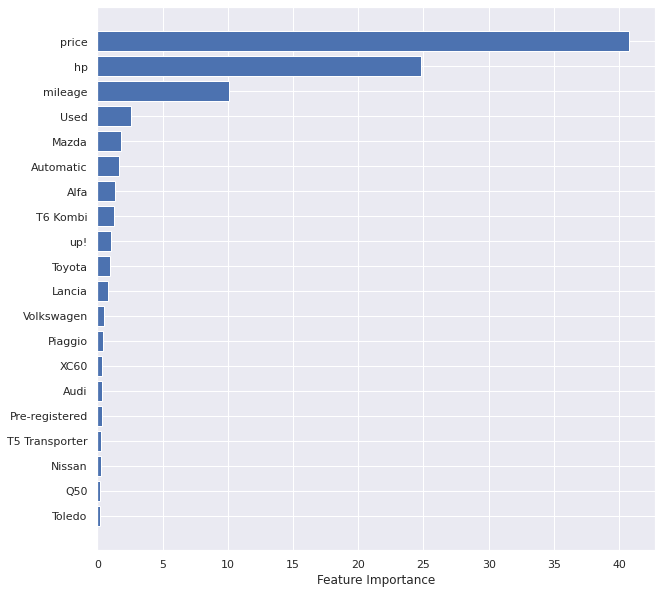

In [16]:
# Plot features by affecting price prediction limited to 20 (exclude price)
sorted_feature_importance = model.get_feature_importance().argsort( 
	)[-20:] 
plt.barh( 
	cars.columns[sorted_feature_importance], 
	model.feature_importances_[sorted_feature_importance] 
) 
plt.xlabel("Feature Importance") 
plt.show() 

## Car Price Estimation

In [17]:
# Manually create and print test data for various cars
realData = pd.DataFrame.from_records([ 
{'mileage': 87000, 'make': 'Volkswagen', 'model': 'Gold', 
'fuel': 'Gasoline', 'gear': 'Manual', 'offerType': 'Used', 
'price': 12990, 'hp': 125, 'year': 2015}, 
{'mileage': 230000, 'make': 'Opel', 'model': 'Zafira Tourer', 
'fuel': 'CNG', 'gear': 'Manual', 'offerType': 'Used', 
'price': 5200, 'hp': 150, 'year': 2012}, 
{'mileage': 5, 'make': 'Mazda', 'model': '3', 'hp': 122, 
'gear': 'Manual', 'offerType': 'Employee\'s car', 
'fuel': 'Gasoline', 'price': 20900, 'year': 2020},
]) 

print(realData)

   mileage        make          model      fuel    gear       offerType  \
0    87000  Volkswagen           Gold  Gasoline  Manual            Used   
1   230000        Opel  Zafira Tourer       CNG  Manual            Used   
2        5       Mazda              3  Gasoline  Manual  Employee's car   

   price   hp  year  
0  12990  125  2015  
1   5200  150  2012  
2  20900  122  2020  


In [18]:
# Perform transformations on test data and add dummies

# Replace year with age and remove make, model and fuel
realData['age'] = datetime.now().year - realData['year'] 
realData = realData.drop('year', axis=1) 
#cars = cars.drop('make', axis=1) 
#cars = cars.drop('model', axis=1) 
realData = realData.drop('fuel', axis=1) 

# Drop empty and null values. Remove outliers with 
# standard deviations more than three from mean
realData = realData.dropna() 
realData = realData[stats.zscore(realData.price) < 3] 
realData = realData[stats.zscore(realData.hp) < 3] 
realData = realData[stats.zscore(realData.mileage) < 3] 

makeDummies = pd.get_dummies(realData.make) 
realData = realData.join(makeDummies) 
realData = realData.drop('make', axis=1) 
 
modelDummies = pd.get_dummies(realData.model) 
realData = realData.join(modelDummies) 
realData = realData.drop('model', axis=1) 

# Replace category values with boolean markers
offerTypeDummies = pd.get_dummies(realData.offerType) 
realData = realData.join(offerTypeDummies) 
realData = realData.drop('offerType', axis=1) 
 
gearDummies = pd.get_dummies(realData.gear) 
realData = realData.join(gearDummies) 
realData = realData.drop('gear', axis=1) 

# Fit model and append test data
fitModel = pd.DataFrame(columns=cars.columns) 
fitModel = fitModel.append(realData, ignore_index=True) 
fitModel = fitModel.fillna(0) 
 
# Create predictions for test data   
preds = model.predict(fitModel) 

/tmp/ipykernel_5109/2088241885.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fitModel = fitModel.append(realData, ignore_index=True)


In [19]:
print('Real Data manually created: ')
print( realData['price'])
print('Predictions: ')
for i in preds:
    print(i, end = ' ')

Real Data manually created: 
0    12990
1     5200
2    20900
Name: price, dtype: int64
Predictions: 
12221.201626228241 5451.517826756868 20837.483882904467 